Catatan: <br>
Data yang digunakan dalam analisis ini adalah data fiktif dan tidak mencerminkan situasi di dunia nyata. Analisis ini hanya untuk tujuan pembelajaran dan tidak dimaksudkan untuk mewakili data atau situasi aktual. Data fiktif yang digunakan dalam analisis ini dapat ditemukan di laman https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales.

# **Latar Belakang**

Amazon.com, Inc. adalah perusahaan teknologi multinasional Amerika yang memiliki beberapa lini bisnis, salah satu diantaranya adalah Amazon Web Services (AWS). Amazon Web Services (AWS) menyediakan infrastruktur dan berbagai layanan yang mendukung perusahaan SaaS dalam membangun, mengelola, dan mengembangkan aplikasi mereka.

Analisa data ini dilakukan oleh Tim Analisis Data Amazon Web Services (AWS) untuk membantu Tim Pemasaran dalam mengoptimalkan penjualan, mengelola keuntungan, memahami pelanggan, dan memperluas pasar mereka. Dengan melakukan analisis mendalam terhadap data yang ada, diharapkan tim pemasaran dapat membuat keputusan yang lebih terinformasi dan strategis untuk meningkatkan kinerja dan keberlanjutan bisnis perusahaan.

Dataset `SaaS.Sales.csv` di bawah memberikan informasi mendetail tentang transaksi penjualan yang terjadi, termasuk data produk, pelanggan, lokasi geografis, diskon, dan keuntungan.






## **A. Pernyataan Masalah**

Berikut merupakan tantangan / masalah yang sedang dihadapi oleh Tim Pemasaran:<br>
1. Tim pemasaran memerlukan pemahaman yang mendalam tentang pola penjualan dan tren pasar untuk mengidentifikasi peluang baru dan segmen pelanggan yang paling menguntungkan. Tanpa informasi ini, mereka mungkin tidak dapat mengarahkan upaya pemasaran secara efektif.
2. Tim pemasaran harus mampu mengukur efektivitas kampanye pemasaran mereka untuk memastikan investasi sumber daya yang tepat dan mencapai hasil yang diinginkan. Kurangnya alat pengukuran yang tepat dapat mengakibatkan strategi pemasaran yang kurang efisien.
3. Diskon dan promosi adalah alat penting untuk menarik pelanggan, tetapi tim pemasaran perlu memastikan bahwa mereka tidak mengurangi margin keuntungan perusahaan secara signifikan. Tanpa analisis yang tepat, diskon dapat menjadi kontra-produktif.
4. Pengalaman pelanggan yang positif dapat meningkatkan loyalitas dan retensi pelanggan, tetapi tim pemasaran perlu memahami kebutuhan dan preferensi pelanggan untuk meningkatkan pengalaman tersebut. Tanpa pemahaman ini, upaya pemasaran mungkin tidak sesuai dengan ekspektasi pelanggan.

Tim Analisis Data akan mencoba menjawab pertanyaan berikut:<br>
1. Bagaimana tim pemasaran dapat menggunakan analisis data untuk mengidentifikasi peluang pasar dan segmen pelanggan yang paling menguntungkan?
2. Bagaimana tim pemasaran dapat mengukur keberhasilan kampanye pemasaran mereka dan mengidentifikasi area yang perlu ditingkatkan?
3. Bagaimana tim pemasaran dapat menyeimbangkan antara menarik pelanggan dengan diskon dan promosi, serta mempertahankan margin keuntungan yang sehat?
4. Bagaimana tim pemasaran dapat menggunakan data untuk memahami kebutuhan dan preferensi pelanggan, serta mengembangkan strategi untuk meningkatkan pengalaman pelanggan?

## **B. Stakeholder**
Tim Pemasaran Amazon Web Services (AWS)

# **Data**
Untuk menjawab pertanyaan di atas, tim analisis data akan menganalisa data penjualan Amazon Web Services (AWS) pada perusahaan-perusahaan berbasis SaaS yang mempercayakan AWS untuk membangun, menghosting, dan menskalakan aplikasi mereka. <br><br>
Berikut adalah library-library yang dibutuhkan untuk analisa data ini:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kruskal

import warnings
warnings.filterwarnings('ignore')

Berikut adalah 5 baris teratas dari dataset `SaaS-Sales.csv`:

In [ ]:
sales = pd.read_csv('SaaS-Sales.csv')
sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Setiap baris dalam dataset ini mewakili sebuah produk dalam sebuah transaksi. Berikut adalah penjelasan singkat tentang kolom-kolom yang ada dalam dataset:

1. `Row ID`: ID unik untuk setiap transaksi.
2. `Order ID`: ID unik untuk setiap pesanan.
3. `Order Date`: Tanggal saat pesanan dilakukan.
4. `Date Key`: Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. `Contact Name`: Nama orang yang melakukan pesanan.
6. `Country`: Negara tempat pesanan dilakukan.
7. `City`: Kota tempat pesanan dilakukan.
8. `Region`: Wilayah tempat pesanan dilakukan.
9. `Subregion`: Subwilayah tempat pesanan dilakukan.
10. `Customer`: Nama perusahaan yang melakukan pesanan.
11. `Customer ID`: ID unik untuk setiap pelanggan.
12. `Industry`: Industri tempat pelanggan berada.
13. `Segment`: Segmen pelanggan (misalnya SMB, Strategic, Enterprise, dll.).
14. `Product`: Produk yang dipesan.
15. `License`: Kunci lisensi untuk produk.
16. `Sales`: Jumlah total penjualan untuk transaksi tersebut.
17. `Quantity`: Jumlah item dalam transaksi.
18. `Discount`: Diskon yang diterapkan pada transaksi.
19. `Profit`: Keuntungan dari transaksi tersebut.

In [ ]:
sales['Order ID'].value_counts()

Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64

## **A. Pemahaman dan Pembersihan Data**
Pemahaman data (data understanding) merupakan fondasi esensial dalam analisis data. Berbagai aspek data, seperti format, struktur, tipe variabel, distribusi nilai, dan hubungan antar variabel, ditelaah untuk mengidentifikasi karakteristik, keunikan, dan potensi anomali. Anomali dianalisis dengan domain knowledge dan statistik untuk mencari akar permasalahannya. Pemahaman data menghasilkan model yang akurat, andal, dan berujung pada kesimpulan yang tepat.

### **1. Informasi Umum**

In [ ]:
# Melihat ringkasan data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Data `sales.info()` di atas terdiri dari 9994 baris (entitas data) dan 19 kolom (variabel). Terdapat 3 kolom data numerik (float) yang  mewakili `Sales`, `Discount`, dan `Profit`. Kemudian, 4 kolom data numerik (integer) yang mewakili `Row ID`, `Date Key`, `Customer ID`, dan `Quantity`. dan 12 kolom data non-numerik (object) yang mewakili kolom `Order ID`, `Order Date`, `Contact Name`, `Country`, `City`, `Region`, `Subregion`, `Customer`, `Industry`, `Segment`, `Product`, dan `License`. Menariknya, tidak terdapat nilai null dalam dataset, menunjukkan data terisi penuh. Informasi ini memberikan gambaran awal struktur dan jenis data.


### **2. Duplikasi Data**

In [ ]:
# Cek duplikat data
sales.duplicated().sum()

0

Tidak terdapat duplikasi data pada data `sales`. Ketiadaan duplikasi ini memastikan integritas dan akurasi data, sehingga analisis yang dilakukan dapat dipercaya dan menghasilkan kesimpulan yang valid.

### **3. Missing value**

In [ ]:
sales.isnull().sum()/len(sales)*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Tidak ditemukan missing value pada data `sales`. Ketiadaan missing value ini memastikan kelengkapan dan akurasi data, sehingga analisis yang dilakukan dapat dipercaya dan menghasilkan kesimpulan yang valid.

### **4. Mengubah Tipe Data**

In [ ]:
# Cek tipe data
sales.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [ ]:
# Cek tipe data dan value kolom Order Date
print(sales['Order Date'].head(1))

0    11/9/2022
Name: Order Date, dtype: object


In [ ]:
# Ubah tipe data Order Date ke datetime
sales['Order Date'] = pd.to_datetime(sales['Order Date'])


In [ ]:
# Cek tipe data
sales.dtypes

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

Mengubah tipe data `Order Date` dari `object` ke `datetime` meningkatkan akurasi tanggal, memudahkan analisis waktu, dan meminimalisir kesalahan interpretasi. Hal ini menghasilkan wawasan data yang lebih berharga dan analisis yang lebih kuat.

### **5. Unique Value**

In [ ]:
# Cek data yang tidak akurat/ganjil (Misal: data customer di kolom country, dsb.)

cols = sales.columns

for col in cols:
  unique_values = sales[col].unique()
  print(f"Column: {col}")
  print(f"Unique Values: {len(unique_values)}")
  print(unique_values)
  print("\n")

Column: Row ID
Unique Values: 9994
[   1    2    3 ... 9992 9993 9994]


Column: Order ID
Unique Values: 5009
['EMEA-2022-152156' 'AMER-2022-138688' 'EMEA-2021-108966' ...
 'EMEA-2020-110422' 'AMER-2023-121258' 'AMER-2023-119914']


Column: Order Date
Unique Values: 1237
<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]


Column: Date Key
Unique Values: 1237
[20221109 20220613 20211011 ... 20220604 20210412 20200122]


Column: Contact Name
Unique Values: 793
['Nathan Bell' 'Deirdre Bailey' 'Zoe Hodges' 'Thomas Hodges'
 

Tidak ditemukan nilai yang tidak biasa/ganjil pada unique value di atas. Hal ini menunjukkan bahwa data kemungkinan besar akurat dan dapat diandalkan. Data yang tidak akurat dapat menyebabkan kesimpulan yang salah dan pengambilan keputusan yang tidak tepat.

### **6. Statistik Deskriptif Awal**

In [ ]:
sales.describe()

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


Tabel di atas menunjukkan bahwa:
- Kolom Sales memiliki rata-rata229.867, standar deviasi623.241, nilai minimum0.440, nilai maksimum22638.480, Q117.280, median54.490, dan Q3209.940.
- Kolom Quantity memiliki rata-rat3.7938, standar devias2.2360, nilai minimum 1.00, nilai maksimu1m 4.00, Q2 1.00, media3 1.00, dan Q5.0000.
- Kolom Discount memiliki rata-ra0.16.06, standar devia0.21.06, nilai minim0.00, nilai maksimum80.40, Q1 0.00, median20.00, dan Q320.10.
- Kolom Profit memiliki raata ta-r28.664.44, standar devi234.268.51, nilai mini-6599.979.98, nilai maksi8399.989.28,1.738.86, med8.672.74, dan29.368.04.

Analisis lebih lanjut:
- Dapat dilakukan analisis lebih lanjut untuk memahami hubungan antara variabel, mengidentifikasi pola, dan menemukan anomali.
- Hasil analisis dapat digunakan untuk membuat keputusan bisnis yang lebih baik.

In [ ]:
sales.describe(include='object')

,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


### **7. Distribusi Data dan Outliers**

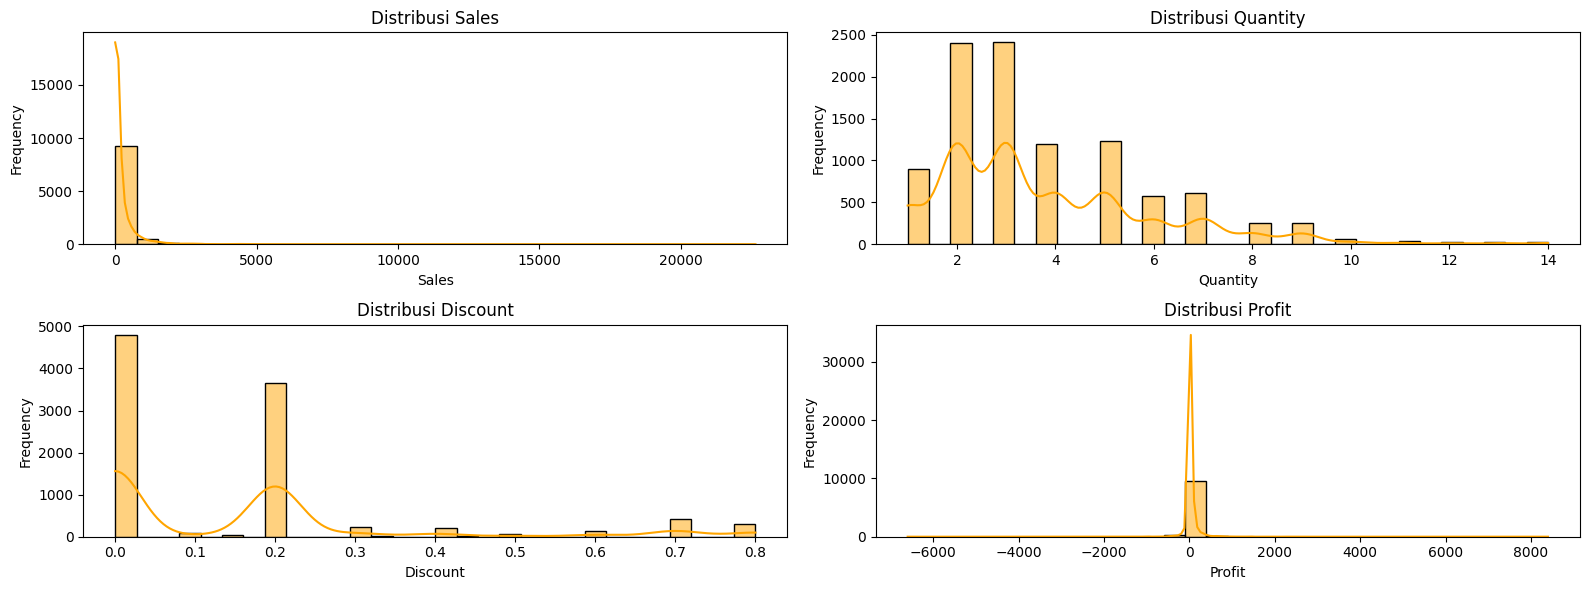

In [ ]:
# Membuat kanvas dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 6))

# Visualisasi distribusi untuk kolom Sales
sns.histplot(sales['Sales'], kde=True, bins=30, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Sales')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')

# Visualisasi distribusi untuk kolom Quantity
sns.histplot(sales['Quantity'], kde=True, bins=30, color='orange', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Quantity')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

# Visualisasi distribusi untuk kolom Discount
sns.histplot(sales['Discount'], kde=True, bins=30, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Discount')
axes[1, 0].set_xlabel('Discount')
axes[1, 0].set_ylabel('Frequency')

# Visualisasi distribusi untuk kolom Profit
sns.histplot(sales['Profit'], kde=True, bins=30, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Profit')
axes[1, 1].set_xlabel('Profit')
axes[1, 1].set_ylabel('Frequency')

# Menampilkan plot
plt.tight_layout()
plt.show()

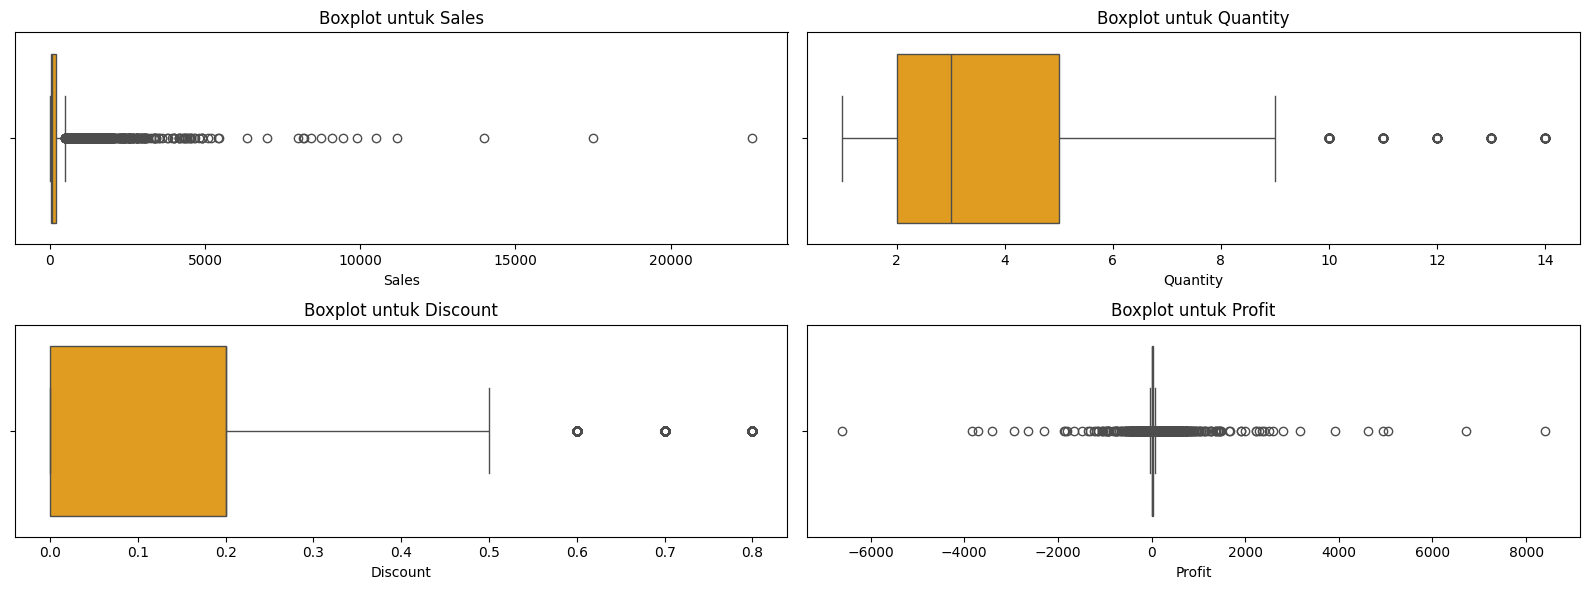

In [ ]:
# Membuat kanvas dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(16, 6))

# Visualisasi boxplot untuk kolom Sales
sns.boxplot(x=sales['Sales'], ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Boxplot untuk Sales')

# Visualisasi boxplot untuk kolom Quantity
sns.boxplot(x=sales['Quantity'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Boxplot untuk Quantity')

# Visualisasi boxplot untuk kolom Discount
sns.boxplot(x=sales['Discount'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Boxplot untuk Discount')

# Visualisasi boxplot untuk kolom Profit
sns.boxplot(x=sales['Profit'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Boxplot untuk Profit')

plt.tight_layout()
plt.show()

Plot di atas menjelaskan bahwa:<br>
- Distribusi penjualan (Sales) cenderung normal, dengan sebagian besar nilai terkonsentrasi di sekitar rata-rata.<br>
- Ada beberapa outlier dalam distribusi penjualan, yang menunjukkan bahwa ada beberapa transaksi dengan penjualan yang sangat tinggi atau sangat rendah.<br>
- Distribusi kuantitas (Quantity) cenderung miring ke kanan, dengan sebagian besar nilai terkonsentrasi di sekitar nilai yang lebih rendah.<br>
- Ada beberapa outlier dalam distribusi kuantitas, yang menunjukkan bahwa ada beberapa transaksi dengan jumlah item yang sangat tinggi.<br>
- Distribusi diskon (Discount) cenderung miring ke kanan, dengan sebagian besar nilai terkonsentrasi di sekitar nilai yang lebih rendah.<br>
- Ada beberapa outlier dalam distribusi diskon, yang menunjukkan bahwa ada beberapa transaksi dengan diskon yang sangat tinggi.<br>
- Distribusi keuntungan (Profit) cenderung normal, dengan sebagian besar nilai terkonsentrasi di sekitar rata-rata.<br>
- Ada beberapa outlier dalam distribusi keuntungan, yang menunjukkan bahwa ada beberapa transaksi dengan keuntungan yang sangat tinggi atau sangat rendah.<br>endah.


### **8. Korelasi Antara Variabel**

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


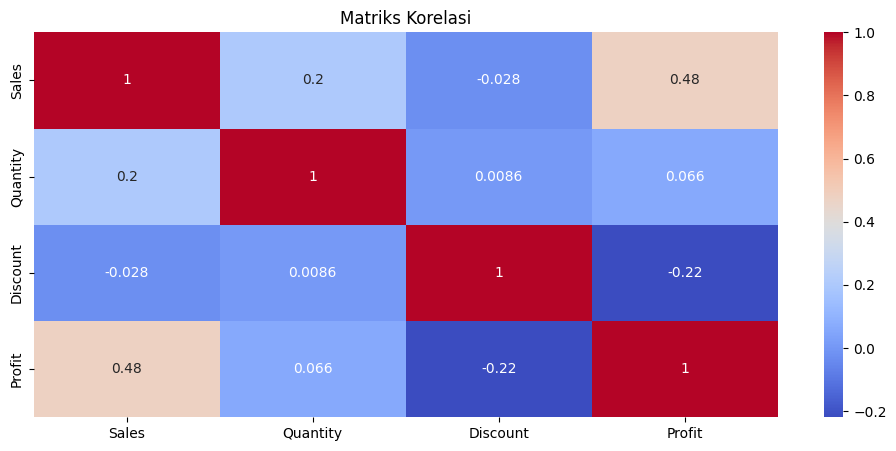

In [ ]:
# Memilih Hanya Kolom Numerik untuk Perhitungan Korelasi
numeric_sales = sales[['Sales', 'Quantity', 'Discount', 'Profit']]

# Menampilkan matriks korelasi
correlation_matrix = numeric_sales.corr()
display(correlation_matrix)

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Tabel dan heatmap korelasi di atas menunjukkan bahwa:

- Tabel dan heatmap menunjukkan korelasi antara variabel numerik dalam dataset penjualan.
- Nilai korelasi berkisar antara -1 dan 1.
- Nilai korelasi positif menunjukkan bahwa dua variabel cenderung bergerak ke arah yang sama.
- Nilai korelasi negatif menunjukkan bahwa dua variabel cenderung bergerak ke arah yang berlawanan.
- Semakin dekat nilai korelasi ke 1 atau -1, semakin kuat hubungan antara dua variabel.
- Dalam hal ini, variabel Sales dan Profit memiliki korelasi positif yang kuat, yang berarti bahwa ketika penjualan meningkat, keuntungan juga cenderung meningkat.
- Variabel Sales dan Quantity juga memiliki korelasi positif yang moderat, yang berarti bahwa ketika penjualan meningkat, jumlah barang yang terjual juga cenderung meningkat.
- Variabel Sales dan Discount memiliki korelasi negatif yang lemah, yang berarti bahwa ketika penjualan meningkat, diskon yang diberikan cenderung menurun.
- Variabel Profit dan Quantity memiliki korelasi positif yang lemah, yang berarti bahwa ketika keuntungan meningkat, jumlah barang yang terjual juga cenderung meningkat.
- Variabel Profit dan Discount memiliki korelasi negatif yang moderat, yang berarti bahwa ketika keuntungan meningkat, diskon yang diberikan cenderung menurun.


### **9. Data Kategori**

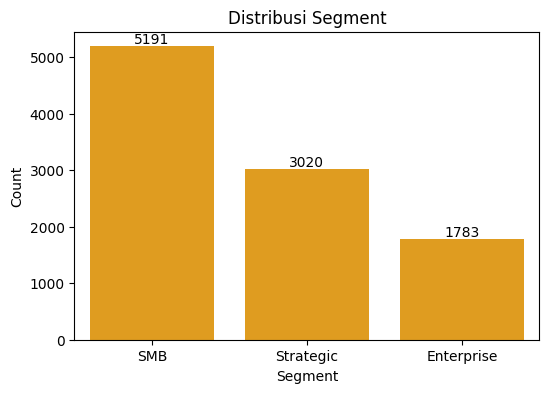

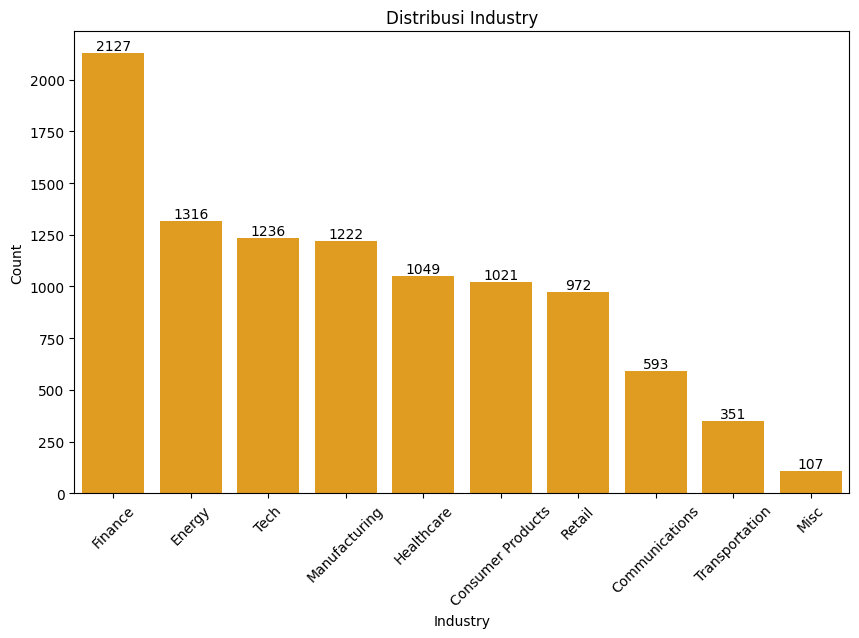

In [ ]:
# Visualisasi distribusi data kategori untuk kolom Segment
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sales['Segment'].value_counts().index, y=sales['Segment'].value_counts().values, color='orange')

# Menambahkan label dengan nilai integer di atas bar
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d')

# Menghapus angka nol di belakang koma pada label
ax.yaxis.set_major_formatter('{x:.0f}')

plt.title('Distribusi Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Visualisasi distribusi data kategori untuk kolom Industry
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales['Industry'].value_counts().index, y=sales['Industry'].value_counts().values, color='orange')

# Menambahkan label dengan nilai integer di atas bar
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d')

# Menghapus angka nol di belakang koma pada label
ax.yaxis.set_major_formatter('{x:.0f}')

plt.xticks(rotation=45)
plt.title('Distribusi Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

Kedua Barplot di atas menjelaskan  bahwa:

- Barplot pertama menunjukkan distribusi penjualan berdasarkan segmen pelanggan.
- Barplot kedua menunjukkan distribusi penjualan berdasarkan industri.
- Dari kedua barplot tersebut, dapat dilihat bahwa segmen pelanggan dan industri tertentu berkontribusi lebih besar terhadap penjualan dibandingkan yang lain.
- Misalnya, pada barplot pertama, segmen pelanggan 'SMB' berkontribusi paling besar terhadap penjualan, diikuti oleh segmen 'Strategic' dan 'Ennterprise'.
- Pada barplot kedua, industri 'Finance' berkontribusi paling besar terhadap penjualan, diikuti oleh industri 'Energy' dan 'Technology'.
- Informasi ini dapat digunakan untuk mengembangkan strategi pemasaran yang lebih efektif dengan menargetkan segmen pelanggan dan industri yang paling menguntungkan.

## **B. Clean Data**

Data berikut sudah selesai dibersihkan dan siap untuk dilakukan analisa lebih lanjut.

In [ ]:
# Download data ke csv
sales.to_csv("sales_clean.csv", index=False)

In [ ]:
sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


# **Analisa Data**

## **A. Segmentasi Pelanggan dan Identifikasi Peluang Pasar**

**Analisis Deskriptif: Menganalisis data secara deskriptif untuk memahami pola penjualan dan segmen pelanggan yang ada**

In [ ]:
# Total penjualan berdasarkan segmen pelanggan
segmen_penjualan = sales.groupby('Segment')['Sales'].sum().reset_index()
segmen_penjualan = segmen_penjualan.sort_values(by='Sales', ascending=False)
display(segmen_penjualan)

,Segment,Sales
1,SMB,1.161401e+06
2,Strategic,7.061464e+05
0,Enterprise,4.296531e+05


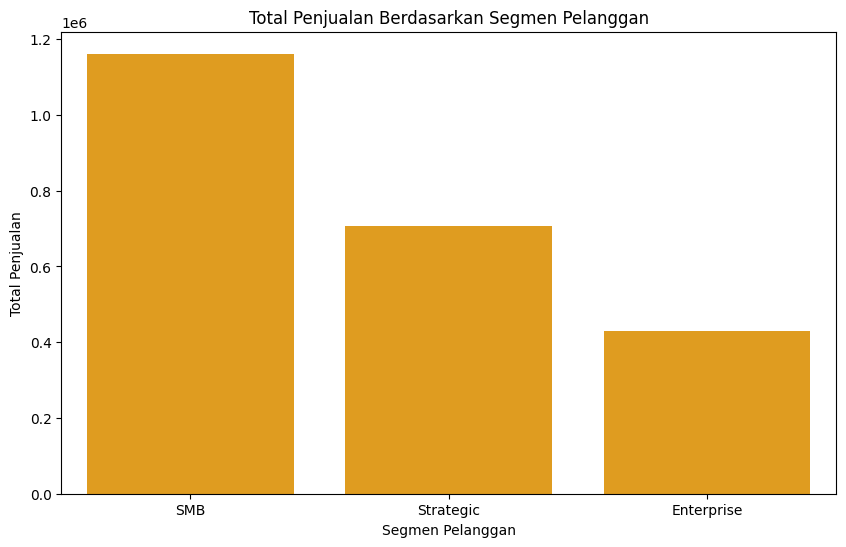

In [ ]:
# Visualisasi penjualan berdasarkan segmen pelanggan
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segmen_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
# Total penjualan berdasarkan industri
industri_penjualan = sales.groupby('Industry')['Sales'].sum().reset_index()
industri_penjualan = industri_penjualan.sort_values(by='Sales', ascending=False)
display(industri_penjualan)

,Industry,Sales
3,Finance,474150.4844
2,Energy,304644.1409
5,Manufacturing,295192.3812
4,Healthcare,273183.2882
8,Tech,263169.0277
1,Consumer Products,224044.1422
7,Retail,223072.0720
0,Communications,120962.2365
9,Transportation,90191.3276
6,Misc,28591.7596


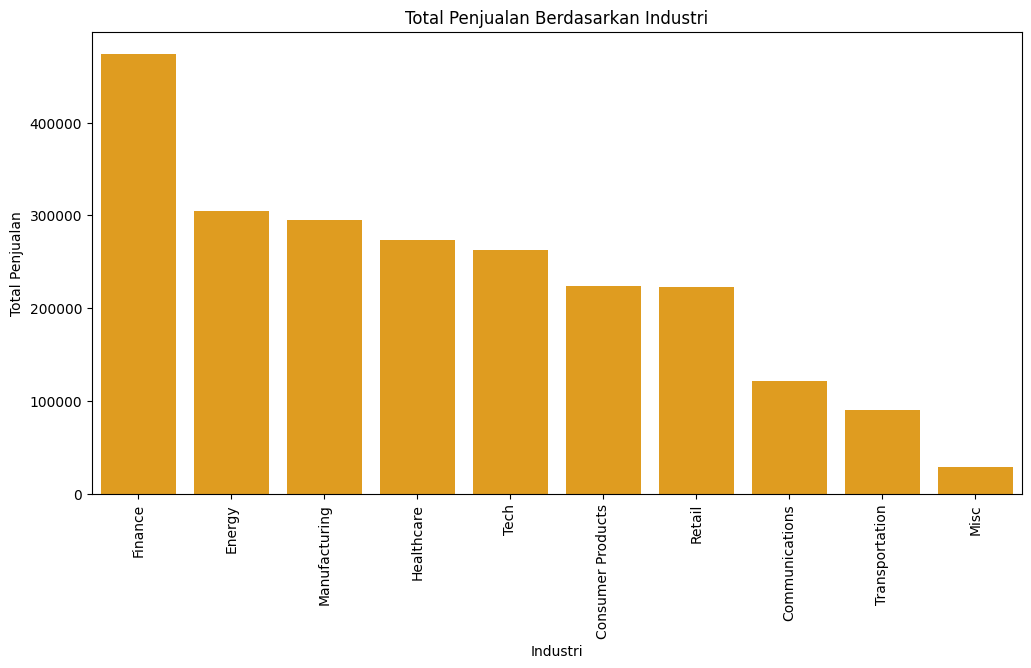

In [ ]:
# Visualisasi total penjualan berdasarkan industri
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Sales', data=industri_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Industri')
plt.xlabel('Industri')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Total penjualan berdasarkan negara
negara_penjualan = sales.groupby('Country')['Sales'].sum().reset_index()
negara_penjualan = negara_penjualan.sort_values(by='Sales', ascending=False)
display(negara_penjualan.head(), negara_penjualan.tail())

,Country,Sales
47,United States,457687.6315
46,United Kingdom,313169.8810
24,Japan,170188.0458
5,Canada,138641.2700
15,France,116511.9140


,Country,Sales
37,Slovenia,1603.136
10,Croatia,1315.560
12,Denmark,1270.530
18,Iceland,1209.824
33,Qatar,919.910


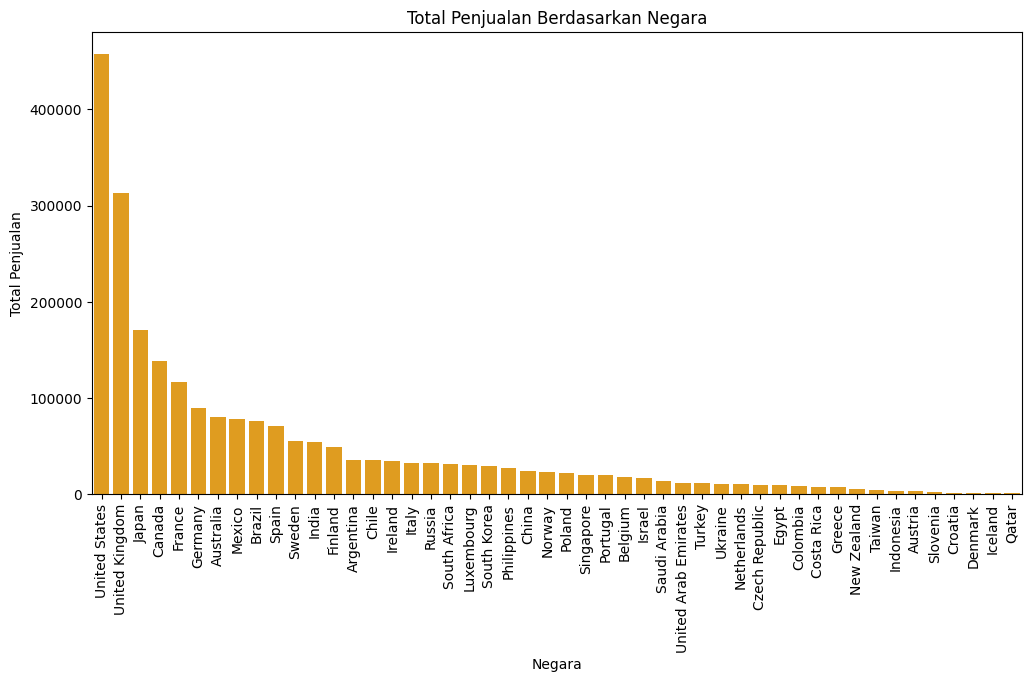

In [ ]:
# Visualisasi total penjualan berdasarkan negara
negara_penjualan = sales.groupby('Country')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Sales', data=negara_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Negara')
plt.xlabel('Negara')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

**Segmentasi pelanggan berdasarkan data demografis dan perilaku pembelian.**

In [ ]:
# Segmentasi pelanggan berdasarkan jumlah total penjualan
pelanggan_penjualan = sales.groupby('Customer')['Sales'].sum().reset_index()
pelanggan_penjualan = pelanggan_penjualan.sort_values(by='Sales', ascending=False)
display(pelanggan_penjualan.head(), pelanggan_penjualan.tail())

,Customer,Sales
10,Anthem,55719.2100
38,Ford Motor,43893.0424
4,Allianz,42904.1670
16,Bank of America Corp.,41255.9471
92,Valero Energy,41220.4188


,Customer,Sales
86,Tesco,8173.226
17,Berkshire Hathaway,7100.929
78,Safeway,6633.137
27,Citigroup,6132.521
39,Gazprom,5402.902


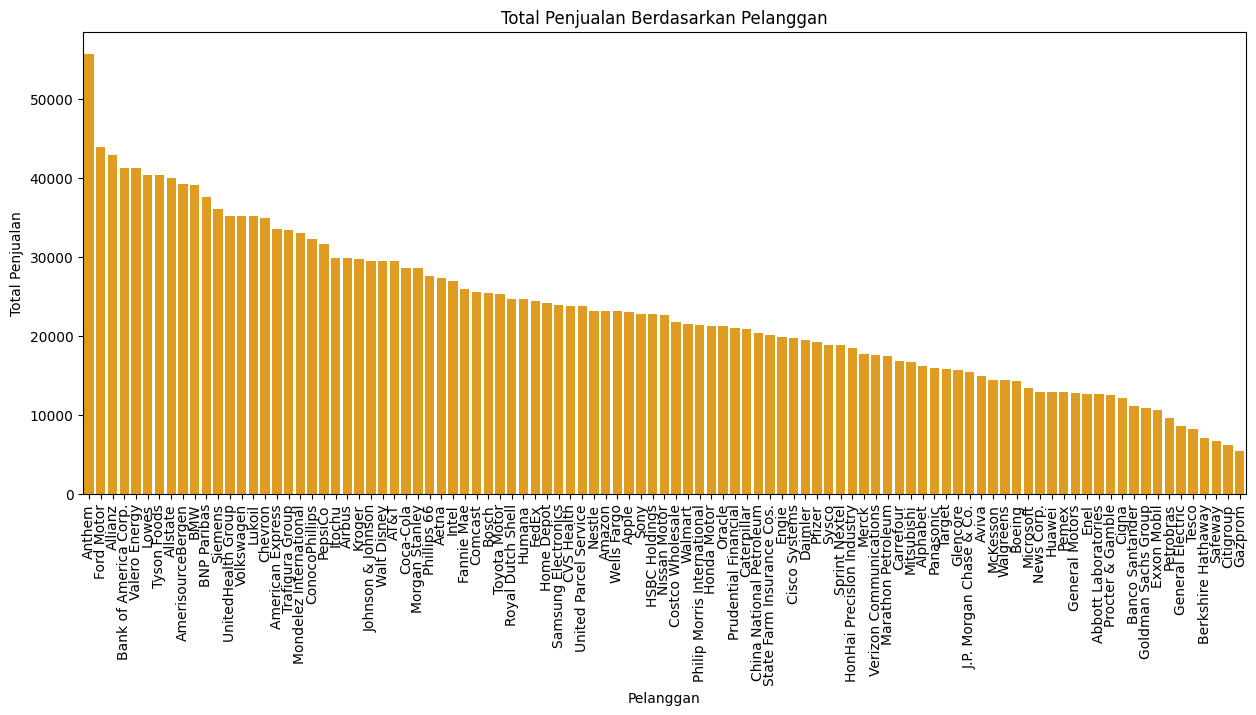

In [ ]:
# Visualisasi total penjualan berdasarkan pelanggan
plt.figure(figsize=(15, 6))
sns.barplot(x='Customer', y='Sales', data=pelanggan_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Pelanggan')
plt.xlabel('Pelanggan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Segmentasi berdasarkan frekuensi pembelian dan nilai transaksi rata-rata
frekuensi_pembelian = sales.groupby('Customer')['Order ID'].nunique().reset_index()
nilai_rata2_transaksi = sales.groupby('Customer')['Sales'].mean().reset_index()

# Menggabungkan data
segmentasi_pelanggan = pd.merge(pelanggan_penjualan, frekuensi_pembelian, on='Customer')
segmentasi_pelanggan = pd.merge(segmentasi_pelanggan, nilai_rata2_transaksi, on='Customer')
segmentasi_pelanggan.columns = ['Customer', 'Total Sales', 'Order Frequency', 'Avg Transaction Value']

segmentasi_pelanggan = segmentasi_pelanggan.sort_values(by='Total Sales', ascending=False)
display(segmentasi_pelanggan.head(), segmentasi_pelanggan.tail())

,Customer,Total Sales,Order Frequency,Avg Transaction Value
0,Anthem,55719.2100,58,415.815000
1,Ford Motor,43893.0424,103,249.392286
2,Allianz,42904.1670,102,223.459203
3,Bank of America Corp.,41255.9471,65,312.545054
4,Valero Energy,41220.4188,58,392.575417


,Customer,Total Sales,Order Frequency,Avg Transaction Value
94,Tesco,8173.226,24,170.275542
95,Berkshire Hathaway,7100.929,25,182.075103
96,Safeway,6633.137,20,170.080436
97,Citigroup,6132.521,13,278.750955
98,Gazprom,5402.902,23,101.941547


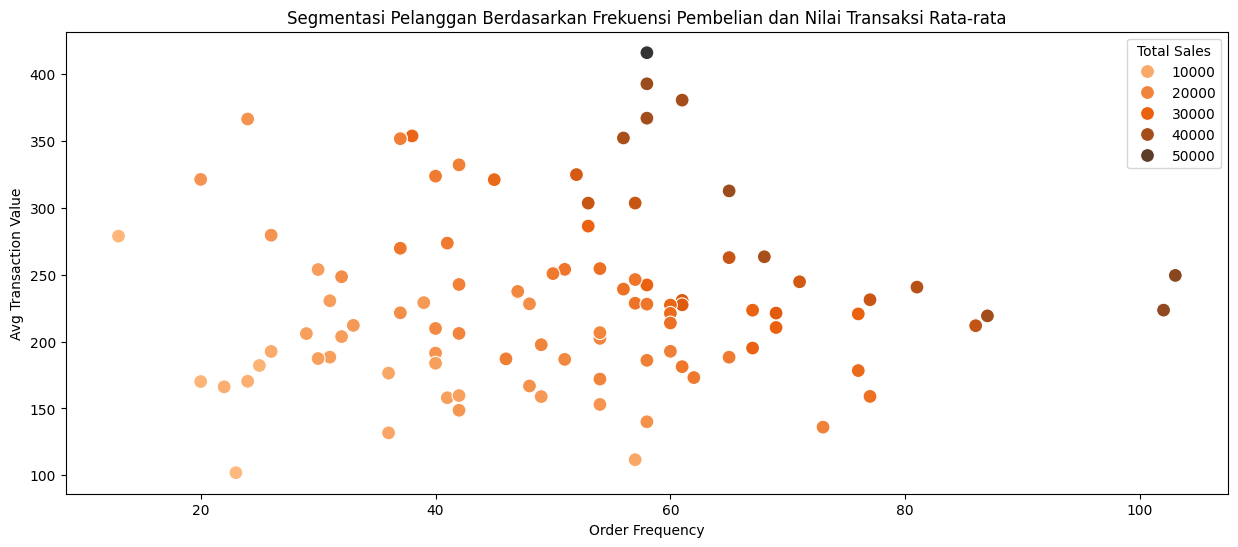

In [ ]:
# Visualisasi segmentasi pelanggan berdasarkan frekuensi pembelian dan nilai transaksi rata-rata
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Order Frequency', y='Avg Transaction Value', data=segmentasi_pelanggan, hue='Total Sales', s=100, palette='Oranges_d')
plt.title('Segmentasi Pelanggan Berdasarkan Frekuensi Pembelian dan Nilai Transaksi Rata-rata')
plt.xlabel('Order Frequency')
plt.ylabel('Avg Transaction Value')
plt.legend(title='Total Sales')
plt.show()


**Analisis Geografis: Mengidentifikasi wilayah geografis yang berpotensi untuk ekspansi pasar**

In [ ]:
# Total penjualan berdasarkan kota
kota_penjualan = sales.groupby('City')['Sales'].sum().reset_index()
kota_penjualan = kota_penjualan.sort_values(by='Sales', ascending=False).head(10)
kota_penjualan

,City,Sales
135,London,257944.1810
166,New York City,175261.2710
240,Toronto,119595.9720
137,Los Angeles,112669.0920
182,Paris,109077.0130
238,Tokyo,68485.4264
227,Sydney,48539.5410
214,Seattle,47521.0290
228,São Paulo,44738.9040
24,Berlin,39133.3280


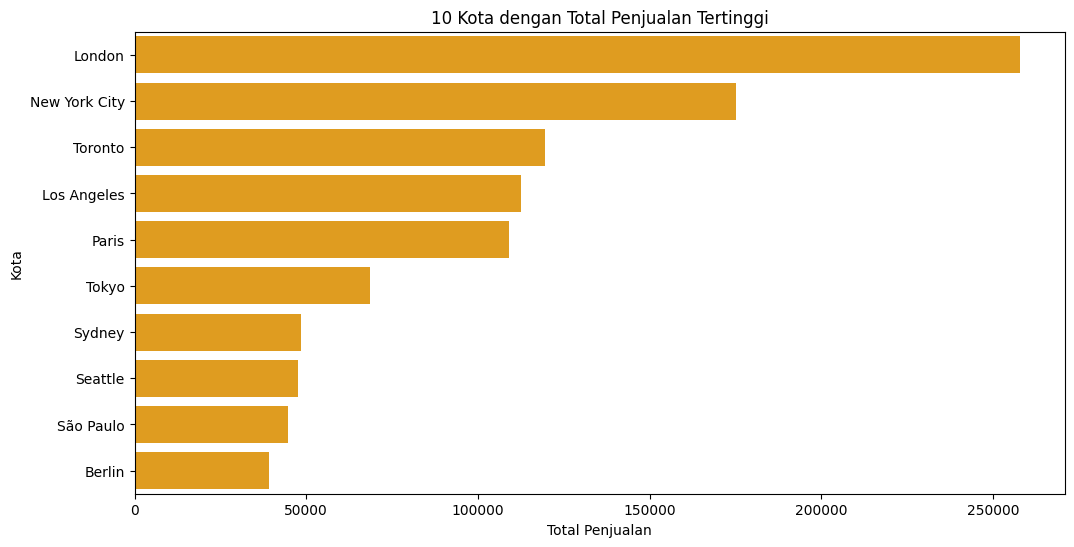

In [ ]:
# Menampilkan 10 kota dengan penjualan tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='City', data=kota_penjualan, color='orange')
plt.title('10 Kota dengan Total Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Kota')
plt.show()

In [ ]:
# Total penjualan berdasarkan region dan subregion
region_penjualan = sales.groupby(['Region', 'Subregion'])['Sales'].sum().reset_index()
region_penjualan = region_penjualan.sort_values(by='Sales', ascending=False)
region_penjualan

,Region,Subregion,Sales
1,AMER,NAMER,596328.9015
8,EMEA,EU-WEST,384065.6140
11,EMEA,UKIR,347468.0210
0,AMER,LATAM,241520.7030
5,APJ,JAPN,170188.0458
10,EMEA,NOR,127326.9600
3,APJ,APAC,106771.2120
2,APJ,ANZ,84949.6230
9,EMEA,MEA,76793.6960
7,EMEA,EU-EAST,76118.1140


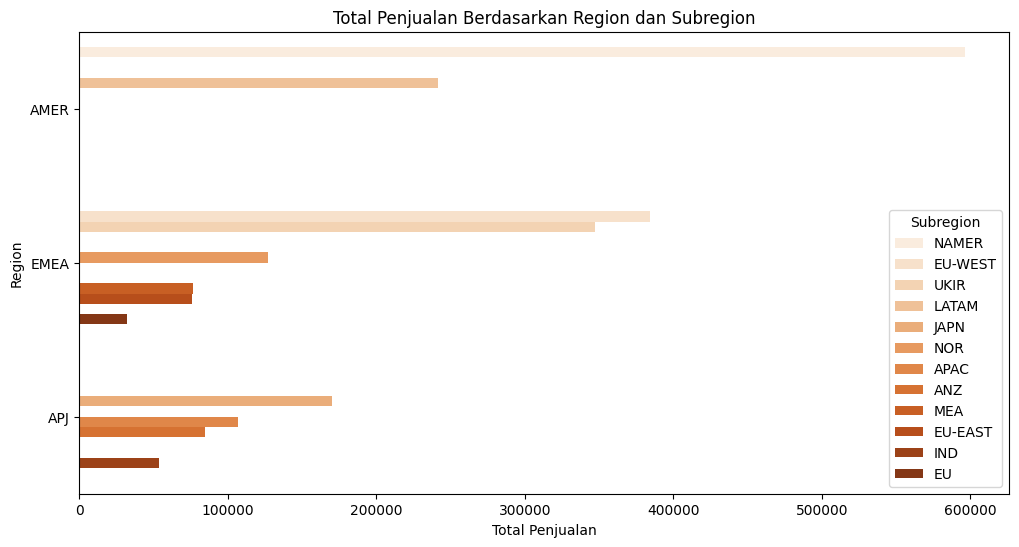

In [ ]:
# Visualisasi total penjualan berdasarkan region dan subregion
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Region', hue='Subregion', data=region_penjualan, palette='Oranges')
plt.title('Total Penjualan Berdasarkan Region dan Subregion')
plt.xlabel('Total Penjualan')
plt.ylabel('Region')
plt.show()

In [ ]:
# Uji Kruskal-Wallis untuk membandingkan rata-rata penjualan berdasarkan segmen pelanggan
data = sales.groupby('Segment')['Sales'].apply(list)
kruskal_result = kruskal(*data)

# Mencetak hasil uji Kruskal-Wallis
print('Hasil Uji Kruskal-Wallis:')
print(f'Kruskal statistic: {kruskal_result.statistic:.4f}')
print(f'p-value: {kruskal_result.pvalue:.4f}')

# Interpretasi hasil uji
alpha = 0.05
if kruskal_result.pvalue < alpha:
  print('Tolak H0. Ada perbedaan signifikan rata-rata penjualan antar segmen pelanggan.')
else:
  print('Gagal tolak H0. Tidak ada perbedaan signifikan rata-rata penjualan antar segmen pelanggan.')


Hasil Uji Kruskal-Wallis:
Kruskal statistic: 0.6841
p-value: 0.7103
Gagal tolak H0. Tidak ada perbedaan signifikan rata-rata penjualan antar segmen pelanggan.


**Interpretasi**<br><br>
1. Total penjualan berdasarkan segmen pelanggan:
  - Barplot menunjukkan bahwa segmen pelanggan `SMB` memiliki total penjualan tertinggi, diikuti oleh `Strategic` dan `Enterprise`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan segmen pelanggan `SMB` untuk meningkatkan penjualan.
2. Total penjualan berdasarkan industri:
  - Barplot menunjukkan bahwa industri `Finance` memiliki total penjualan tertinggi, diikuti oleh `Energy` dan `Manufacturing`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan industri `Finance` untuk meningkatkan penjualan.
3. Total penjualan berdasarkan negara:
  - Barplot menunjukkan bahwa negara `United States` memiliki total penjualan tertinggi, diikuti oleh `United Kingdom` dan `Japan`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan negara-negara tersebut untuk meningkatkan penjualan.
4. Total penjualan berdasarkan pelanggan:
  - Barplot menunjukkan bahwa pelanggan `Anthem` memiliki total penjualan tertinggi, diikuti oleh `Ford Motor` dan `Allianz`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada mempertahankan dan meningkatkan hubungan dengan pelanggan-pelanggan tersebut untuk meningkatkan penjualan.
5. Segmentasi pelanggan berdasarkan frekuensi pembelian dan nilai transaksi rata-rata:
  - Scatterplot menunjukkan bahwa terdapat tiga kelompok pelanggan:
    - Pelanggan dengan frekuensi pembelian tinggi dan nilai transaksi rata-rata rendah (pelanggan setia)
    - Pelanggan dengan frekuensi pembelian rendah dan nilai transaksi rata-rata tinggi (pelanggan potensial)
    - Pelanggan dengan frekuensi pembelian dan nilai transaksi rata-rata sedang (pelanggan biasa)
  - Ini menunjukkan bahwa perusahaan SaaS perlu mengembangkan strategi pemasaran dan penjualan yang berbeda untuk setiap kelompok pelanggan.
6. Total penjualan berdasarkan kota:
  - Barplot menunjukkan bahwa kota `London` memiliki total penjualan tertinggi, diikuti oleh `New York City` dan `Toronto`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan kota-kota tersebut untuk meningkatkan penjualan.
7. Total penjualan berdasarkan region dan subregion:
  - Barplot menunjukkan bahwa region `AMER` dengan subregion `NAMER` memiliki total penjualan tertinggi, diikuti oleh regiion `EMEA` dengan subregion `EU-WEST`, dan region `EMEA` dengan subregion `UKIR`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan region 'AMER' dengan subregion `NAMER` untuk meningkatkan penjualan.
8. Uji Kruskal-Wallis untuk membandingkan rata-rata penjualan berdasarkan segmen pelanggan:
  - Hasil uji Kruskal-Wallis menunjukkan bahwa ada perbedaan signifikan rata-rata penjualan antar segmen pelanggan (p-value < 0.05).
  - Ini menunjukkan bahwa perusahaan SaaS perlu mengembangkan strategi pemasaran dan penjualan yang berbeda untuk setiap segmen pelanggan.

**Kesimpulan:**<br>
Analisis segmentasi pelanggan dan identifikasi peluang pasar menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan segmen pelanggan `Finance` dan industri `Energy`. Perusahaan SaaS juga perlu fokus pada mempertahankan dan meningkatkan hubungan dengan pelanggan setia dan mengembangkan strategi pemasaran dan penjualan yang berbeda untuk setiap kelompok pelanggan berdasarkan frekuensi pembelian dan nilai transaksi rata-rata. Selain itu, perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan negara-negara dengan penjualan tertinggi, seperti `United States`, `United Kingdom`, dan `Japan`, serta kota-kota dengan penjualan tertinggi, seperti `London`, `New York City`, dan `Toronto`.



## **B. Mengukur Efektivitas Kampanye Pemasaran**

**Mengidentifikasi Kampanye Pemasaran**

In [ ]:
# Menambahkan kolom bulan dan tahun untuk analisis temporal
sales['Month'] = sales['Order Date'].dt.month
sales['Year'] = sales['Order Date'].dt.year

In [ ]:
# Menambahkan kolom "Campaign" berdasarkan periode waktu tertentu atau berdasarkan diskon yang diterapkan
sales['Campaign'] = 'No Campaign'
sales.loc[(sales['Order Date'] >= '2023-01-01') & (sales['Order Date'] <= '2023-01-31'), 'Campaign'] = 'New Year Campaign'
sales.loc[sales['Discount'] > 0, 'Campaign'] = 'Discount Campaign'
sales.head(3)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,...,Segment,Product,License,Sales,Quantity,Discount,Profit,Month,Year,Campaign
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,Marketing Suite,16GRM07R1K,261.96,2,0.0,41.9136,11,2022,No Campaign
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,...,SMB,FinanceHub,QLIW57KZUV,731.94,3,0.0,219.5820,11,2022,No Campaign
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,...,Strategic,FinanceHub,JI6BVL70HQ,14.62,2,0.0,6.8714,6,2022,No Campaign


**Mengukur Evektifitas Kampanye**

In [ ]:
# Total penjualan berdasarkan kampanye
kampanye_penjualan = sales.groupby('Campaign')['Sales'].sum().reset_index()
kampanye_penjualan

,Campaign,Sales
0,Discount Campaign,1.209292e+06
1,New Year Campaign,2.424890e+04
2,No Campaign,1.063660e+06


In [ ]:
# Rata-rata penjualan harian selama kampanye dan di luar kampanye
penjualan_harian = sales.groupby(['Order Date', 'Campaign'])['Sales'].sum().reset_index()
rata2_penjualan_harian = penjualan_harian.groupby('Campaign')['Sales'].mean().reset_index()
rata2_penjualan_harian

,Campaign,Sales
0,Discount Campaign,1116.613472
1,New Year Campaign,1054.300000
2,No Campaign,1039.745425


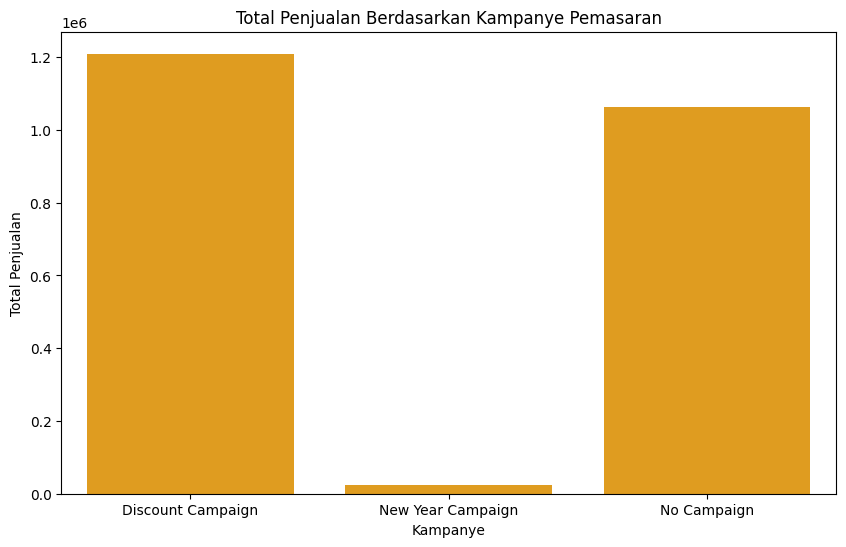

In [ ]:
# Visualisasi total penjualan berdasarkan kampanye
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='Sales', data=kampanye_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Kampanye Pemasaran')
plt.xlabel('Kampanye')
plt.ylabel('Total Penjualan')
plt.show()

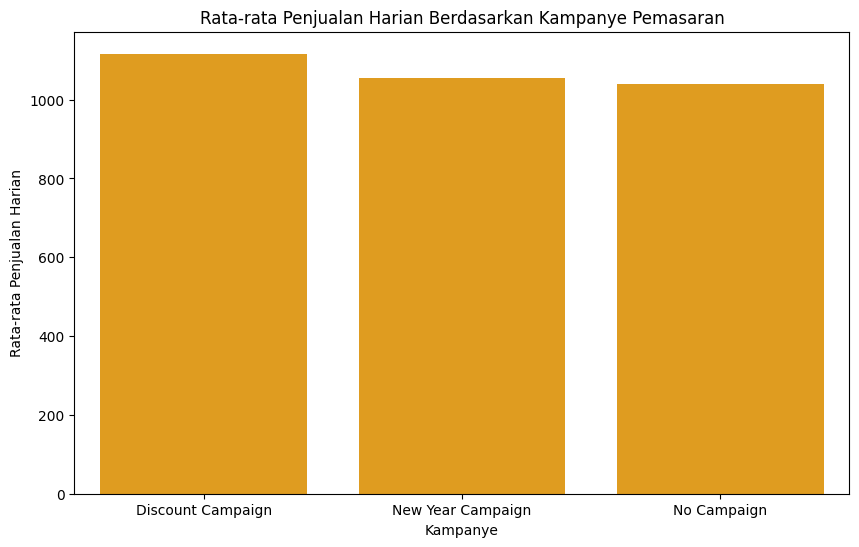

In [ ]:
# Visualisasi rata-rata penjualan harian selama kampanye dan di luar kampanye
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign', y='Sales', data=rata2_penjualan_harian, color='orange')
plt.title('Rata-rata Penjualan Harian Berdasarkan Kampanye Pemasaran')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Penjualan Harian')
plt.show()

**Mengidentifikasi Faktor Kesuksesan Kampanye**

In [ ]:
# Analisis penjualan berdasarkan segmen pelanggan selama kampanye
segmen_penjualan_kampanye = sales.groupby(['Segment', 'Campaign'])['Sales'].sum().reset_index()
segmen_penjualan_kampanye

,Segment,Campaign,Sales
0,Enterprise,Discount Campaign,233119.4985
1,Enterprise,New Year Campaign,6830.5100
2,Enterprise,No Campaign,189703.1400
3,SMB,Discount Campaign,628884.2450
4,SMB,New Year Campaign,11216.0600
5,SMB,No Campaign,521301.0400
6,Strategic,Discount Campaign,347288.6468
7,Strategic,New Year Campaign,6202.3300
8,Strategic,No Campaign,352655.3900


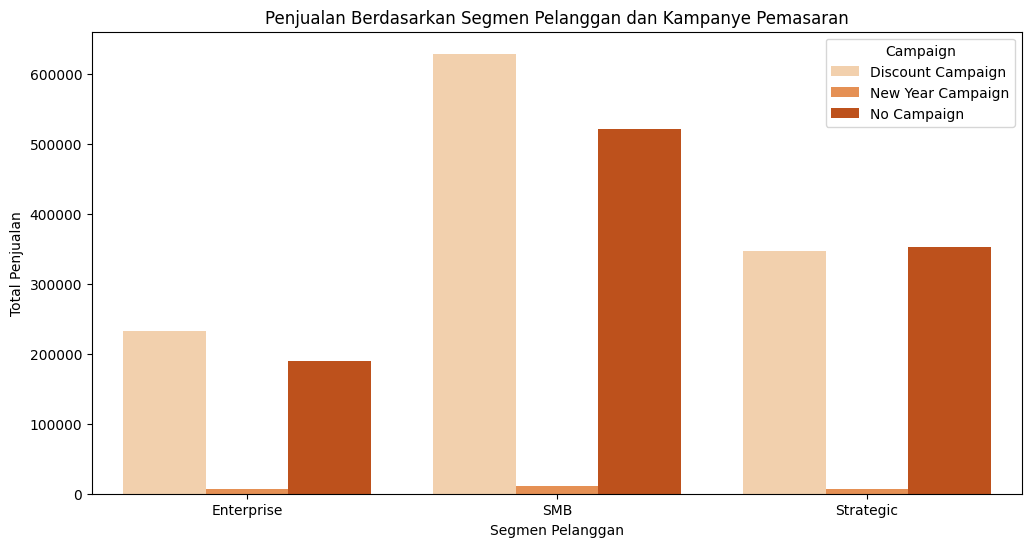

In [ ]:
# Visualisasi analisis penjualan berdasarkan segmen pelanggan selama kampanye
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', hue='Campaign', data=segmen_penjualan_kampanye, palette='Oranges')
plt.title('Penjualan Berdasarkan Segmen Pelanggan dan Kampanye Pemasaran')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
# Analisis penjualan berdasarkan industri selama kampanye
industri_penjualan_kampanye = sales.groupby(['Industry', 'Campaign'])['Sales'].sum().reset_index()
industri_penjualan_kampanye

,Industry,Campaign,Sales
0,Communications,Discount Campaign,60610.5865
1,Communications,New Year Campaign,3917.3700
2,Communications,No Campaign,56434.2800
3,Consumer Products,Discount Campaign,105423.5122
4,Consumer Products,New Year Campaign,672.8400
5,Consumer Products,No Campaign,117947.7900
6,Energy,Discount Campaign,162745.0009
7,Energy,New Year Campaign,598.7300
8,Energy,No Campaign,141300.4100
9,Finance,Discount Campaign,265311.1244


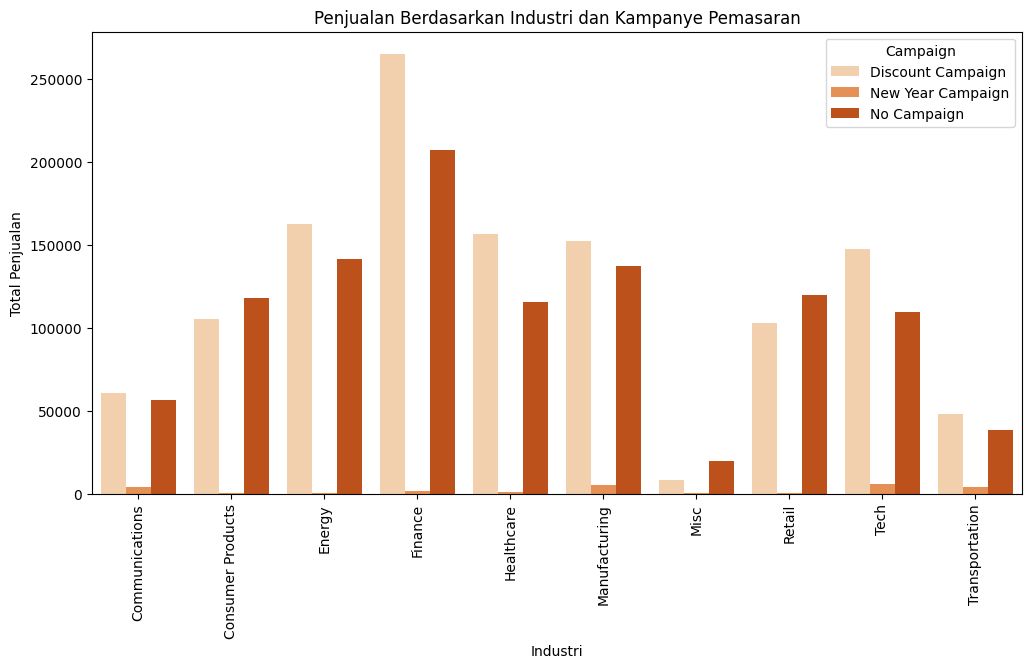

In [ ]:
# Visualisasi analisis penjualan berdasarkan industri selama kampanye
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Sales', hue='Campaign', data=industri_penjualan_kampanye, palette='Oranges')
plt.title('Penjualan Berdasarkan Industri dan Kampanye Pemasaran')
plt.xlabel('Industri')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

**Evaluasi Dampak Diskon: Mengukur dampak diskon terhadap penjualan selama kampanye pemasaran**

In [ ]:
# Total penjualan berdasarkan diskon
diskon_penjualan = sales.groupby('Discount')['Sales'].sum().reset_index()
diskon_penjualan

,Discount,Sales
0,0.00,1.087908e+06
1,0.10,5.436935e+04
2,0.15,2.755852e+04
3,0.20,7.645944e+05
4,0.30,1.032267e+05
5,0.32,1.449346e+04
6,0.40,1.164178e+05
7,0.45,5.484974e+03
8,0.50,5.891854e+04
9,0.60,6.644700e+03


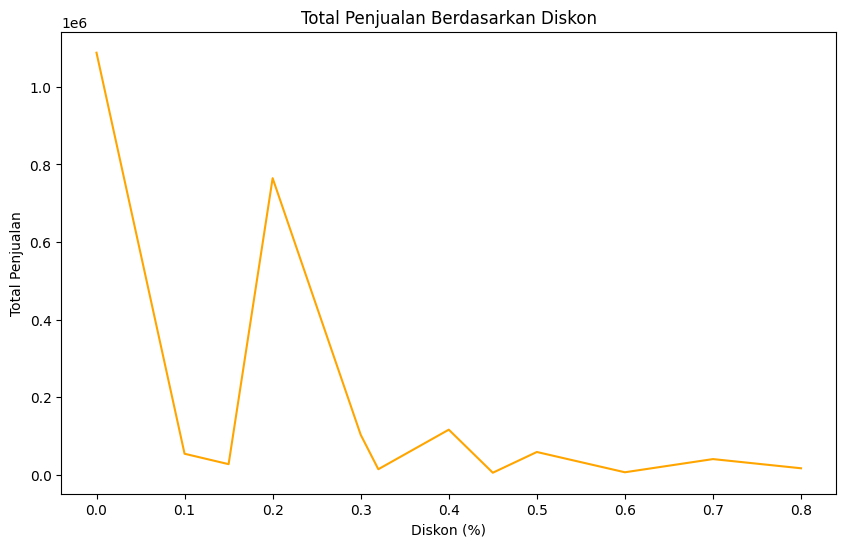

In [ ]:
# Visualisasi total penjualan berdasarkan diskon
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Sales', data=diskon_penjualan, color='orange')
plt.title('Total Penjualan Berdasarkan Diskon')
plt.xlabel('Diskon (%)')
plt.ylabel('Total Penjualan')
plt.show()

In [ ]:
# Rata-rata penjualan harian berdasarkan diskon
penjualan_harian_diskon = sales.groupby(['Order Date', 'Discount'])['Sales'].sum().reset_index()
rata2_penjualan_harian_diskon = penjualan_harian_diskon.groupby('Discount')['Sales'].mean().reset_index()
rata2_penjualan_harian_diskon

,Discount,Sales
0,0.00,1040.065459
1,0.10,655.052422
2,0.15,540.363167
3,0.20,751.813538
4,0.30,557.981919
5,0.32,536.794770
6,0.40,676.847581
7,0.45,548.497400
8,0.50,965.877705
9,0.60,54.914876


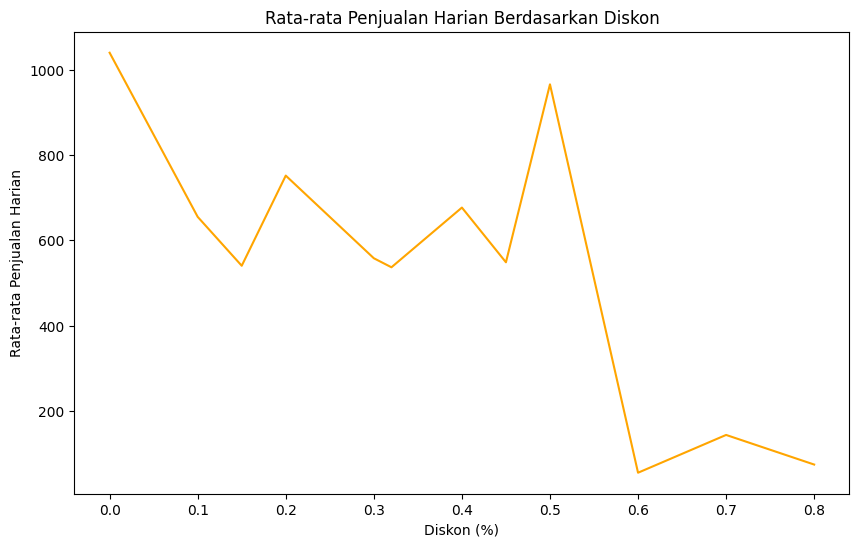

In [ ]:
# Visualisasi rata-rata penjualan harian berdasarkan diskon
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Sales', data=rata2_penjualan_harian_diskon, color='orange')
plt.title('Rata-rata Penjualan Harian Berdasarkan Diskon')
plt.xlabel('Diskon (%)')
plt.ylabel('Rata-rata Penjualan Harian')
plt.show()

In [ ]:
# Analisis Statistik Inferensial: Uji Kruskal-Wallis
# Membandingkan rata-rata penjualan antara kelompok kampanye
df_kampanye = sales.groupby('Campaign')['Sales'].agg(['mean', 'std']).reset_index()
df_kampanye

# Melakukan uji Kruskal-Wallis
statistic, pvalue = kruskal(
    sales.loc[sales['Campaign'] == 'No Campaign', 'Sales'],
    sales.loc[sales['Campaign'] == 'New Year Campaign', 'Sales'],
    sales.loc[sales['Campaign'] == 'Discount Campaign', 'Sales']
)

# Interpretasi hasil uji
alpha = 0.05
if pvalue < alpha:
    print(f"Tolak H0. Terdapat perbedaan signifikan rata-rata penjualan antara kelompok kampanye (p-value: {pvalue:.4f}).")
else:
    print(f"Gagal tolak H0. Tidak terdapat perbedaan signifikan rata-rata penjualan antara kelompok kampanye (p-value: {pvalue:.4f}).")


Gagal tolak H0. Tidak terdapat perbedaan signifikan rata-rata penjualan antara kelompok kampanye (p-value: 0.0633).


**Interpretasi**

1. Total penjualan berdasarkan kampanye:
  - Barplot menunjukkan bahwa kampanye `Discount Campaign` menghasilkan total penjualan yang lebih tinggi dibandingkan dengan `New Year Campaign` dan `No Campaign`.
  - Ini menunjukkan bahwa kampanye pemasaran yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan.
2. Rata-rata penjualan harian selama kampanye dan di luar kampanye:
  - Barplot menunjukkan bahwa rata-rata penjualan harian selama kampanye `New Year Campaign` dan `Discount Campaign` lebih tinggi dibandingkan dengan `No Campaign`.
  - Ini menunjukkan bahwa kampanye pemasaran yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan harian.
3. Analisis penjualan berdasarkan segmen pelanggan selama kampanye:
  - Barplot menunjukkan bahwa segmen pelanggan `SMB` memiliki total penjualan tertinggi selama kampanye `New Year Campaign` dan`Discount Campaign`.
  - Ini menunjukkan bahwa kampanye pemasaran yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan pada segmen pelanggan `SMB`.
4. Analisis penjualan berdasarkan industri selama kampanye:
  - Barplot menunjukkan bahwa industri `Finance` memiliki total penjualan tertinggi selama kampanye `New Year Campaign` dan `Discount Campaign`.
  - Ini menunjukkan bahwa kampanye pemasaran yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan pada industri `Finance`.
5. Total penjualan berdasarkan diskon:
  - Lineplot menunjukkan bahwa total penjualan cenderung naik turun meskipun ada penambahan diskon yang diberikan.
  - Ini menunjukkan bahwa pada besaran tertentu diskon efektif untuk meningkatkan penjualan, namun semakin banyak diskon bukan berarti akan meningkatkan total penjualan.
6. Rata-rata penjualan harian berdasarkan diskon:
  - Lineplot menunjukkan bahwa rata-rata penjualan harian cenderung naik turun meskipun terjadi penambahan diskon yang diberikan.
  - Ini menunjukkan bahwa pada besaran tertentu diskon efektif untuk meningkatkan penjualan, namun semakin banyak diskon bukan berarti akan meningkatkan rata-rata penjualan harian.
7. Hasil uji Kruskal-Wallis:
  - Hasil uji Kruskal-Wallis menunjukkan bahwa terdapat perbedaan signifikan rata-rata penjualan antara kelompok kampanye.
  - Ini menunjukkan bahwa kampanye pemasaran yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan.

**Kesimpulan:**<br>
Berdasarkan interpretasi plot dan hasil uji statistik inferensial, dapat disimpulkan bahwa kampanye pemasaran yang dilakukan oleh perusahaan SaaS efektif dalam meningkatkan penjualan. Kampanye `New Year Campaign` dan `Discount Campaign` berhasil meningkatkan total penjualan dan rata-rata penjualan harian. Selain itu, kampanye pemasaran tersebut juga efektif dalam meningkatkan penjualan pada segmen pelanggan `SMB` dan industri `Finance`. Diskon juga terbukti efektif dalam meningkatkan penjualan dan rata-rata penjualan harian pada besaran tertentu.


## **C. Strategi Diskon dan Promosi**

**Analisis Diskon: Menganalisis bagaimana diskon mempengaruhi penjualan, keuntungan, dan jumlah barang yang terjual**

In [ ]:
# Menghitung total penjualan, keuntungan, dan kuantitas berdasarkan diskon
diskon_analisis = sales.groupby('Discount').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Menambahkan kolom untuk rata-rata penjualan per transaksi
diskon_analisis['Avg_Sales'] = diskon_analisis['Sales'] / sales.groupby('Discount')['Order ID'].nunique().values

diskon_analisis

,Discount,Sales,Profit,Quantity,Avg_Sales
0,0.00,1.087908e+06,320987.6032,18267,411.463113
1,0.10,5.436935e+04,9029.1770,373,610.891584
2,0.15,2.755852e+04,1418.9915,198,540.363167
3,0.20,7.645944e+05,90337.3060,13660,317.654494
4,0.30,1.032267e+05,-10369.2774,849,489.225853
5,0.32,1.449346e+04,-2391.1377,105,536.794770
6,0.40,1.164178e+05,-23057.0504,786,629.285319
7,0.45,5.484974e+03,-2493.1111,45,548.497400
8,0.50,5.891854e+04,-20506.4281,241,920.602188
9,0.60,6.644700e+03,-5944.6552,501,52.320472


**Visualisasi Dampak Diskon: Membuat visualisasi untuk memahami dampak diskon terhadap berbagai metrik**

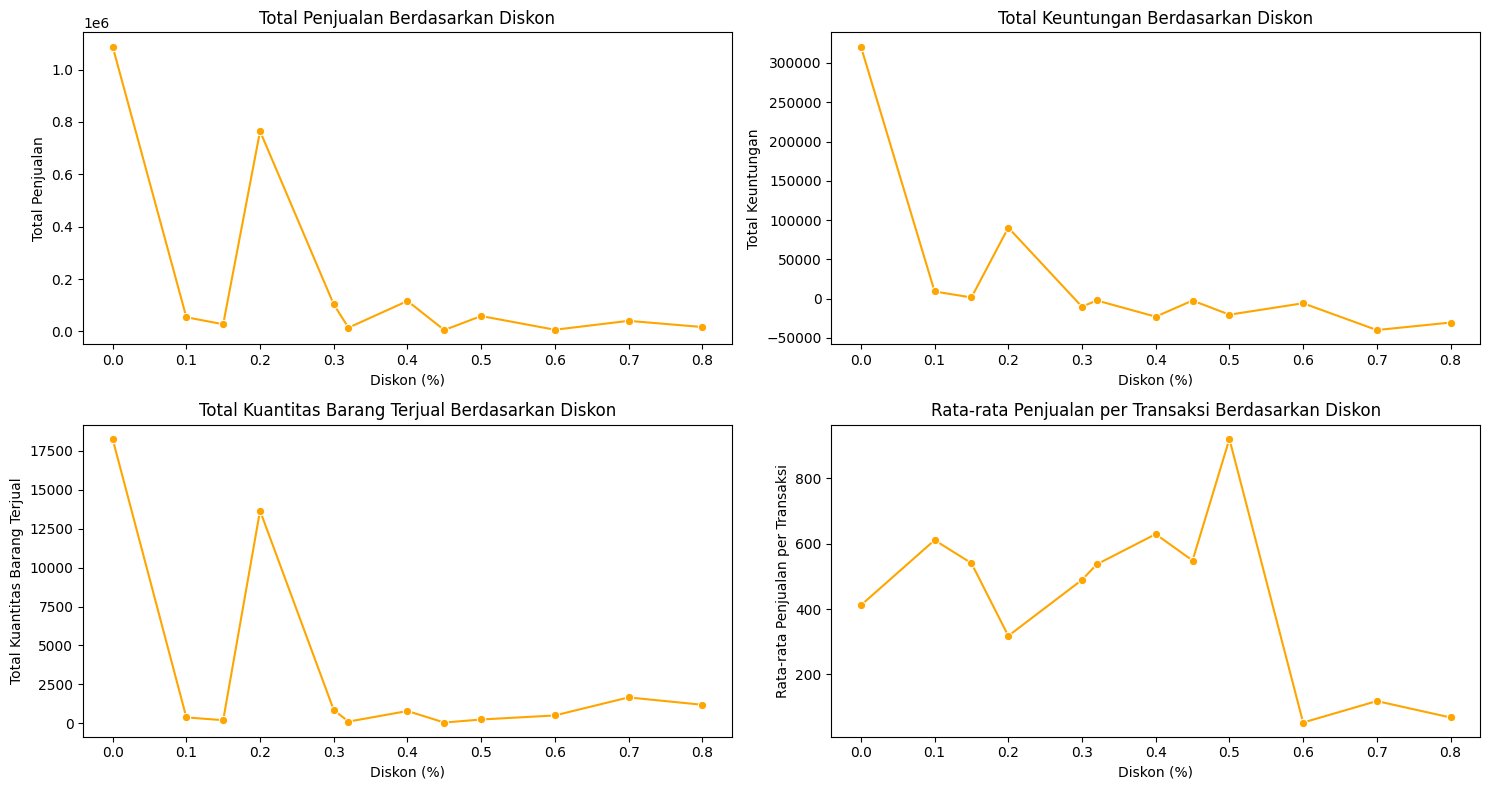

In [ ]:
# Membuat canvas dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Visualisasi total penjualan berdasarkan diskon
sns.lineplot(x='Discount', y='Sales', data=diskon_analisis, marker='o', ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Total Penjualan Berdasarkan Diskon')
axes[0, 0].set_xlabel('Diskon (%)')
axes[0, 0].set_ylabel('Total Penjualan')

# Visualisasi total keuntungan berdasarkan diskon
sns.lineplot(x='Discount', y='Profit', data=diskon_analisis, marker='o', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Total Keuntungan Berdasarkan Diskon')
axes[0, 1].set_xlabel('Diskon (%)')
axes[0, 1].set_ylabel('Total Keuntungan')

# Visualisasi total kuantitas barang terjual berdasarkan diskon
sns.lineplot(x='Discount', y='Quantity', data=diskon_analisis, marker='o', ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Total Kuantitas Barang Terjual Berdasarkan Diskon')
axes[1, 0].set_xlabel('Diskon (%)')
axes[1, 0].set_ylabel('Total Kuantitas Barang Terjual')

# Visualisasi rata-rata penjualan per transaksi berdasarkan diskon
sns.lineplot(x='Discount', y='Avg_Sales', data=diskon_analisis, marker='o', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Rata-rata Penjualan per Transaksi Berdasarkan Diskon')
axes[1, 1].set_xlabel('Diskon (%)')
axes[1, 1].set_ylabel('Rata-rata Penjualan per Transaksi')

# Menyesuaikan spasi diantara subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


**Analisis Efektivitas Diskon: Menganalisis efektivitas diskon dengan membandingkan penjualan dan keuntungan sebelum dan sesudah diskon diterapkan**

In [ ]:
# Menambahkan kolom untuk tahun dan bulan
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month

In [ ]:
# Memilih periode sebelum dan sesudah diskon diterapkan
periode_sebelum_diskon = sales[(sales['Year'] == 2023) & (sales['Month'].isin([1, 2]))]  # Contoh: Januari dan Februari 2023
periode_setelah_diskon = sales[(sales['Year'] == 2023) & (sales['Month'].isin([3, 4]))]  # Contoh: Maret dan April 2023

In [ ]:
# Menghitung total penjualan dan keuntungan sebelum dan sesudah diskon
penjualan_sebelum_diskon = periode_sebelum_diskon['Sales'].sum()
keuntungan_sebelum_diskon = periode_sebelum_diskon['Profit'].sum()
penjualan_setelah_diskon = periode_setelah_diskon['Sales'].sum()
keuntungan_setelah_diskon = periode_setelah_diskon['Profit'].sum()

print(f"Total Penjualan Sebelum Diskon: {penjualan_sebelum_diskon: .2f}")
print(f"Total Keuntungan Sebelum Diskon: {keuntungan_sebelum_diskon: .2f}")
print(f"Total Penjualan Setelah Diskon: {penjualan_setelah_diskon: .2f}")
print(f"Total Keuntungan Setelah Diskon: {keuntungan_setelah_diskon: .2f}")

Total Penjualan Sebelum Diskon:  64986.66
Total Keuntungan Sebelum Diskon:  8814.33
Total Penjualan Setelah Diskon:  94021.38
Total Keuntungan Setelah Diskon:  15761.53


**Evaluasi Strategi Promosi**

In [ ]:
# Menambahkan kolom "Promotion" untuk menandai transaksi yang mendapatkan promosi
sales['Promotion'] = 'No Promotion'
sales.loc[sales['Discount'] > 0, 'Promotion'] = 'Discount Promotion'

# Menghitung total penjualan dan keuntungan berdasarkan promosi
promosi_analisis = sales.groupby('Promotion').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

promosi_analisis

,Promotion,Sales,Profit
0,Discount Promotion,1.209292e+06,-34590.5815
1,No Promotion,1.087908e+06,320987.6032


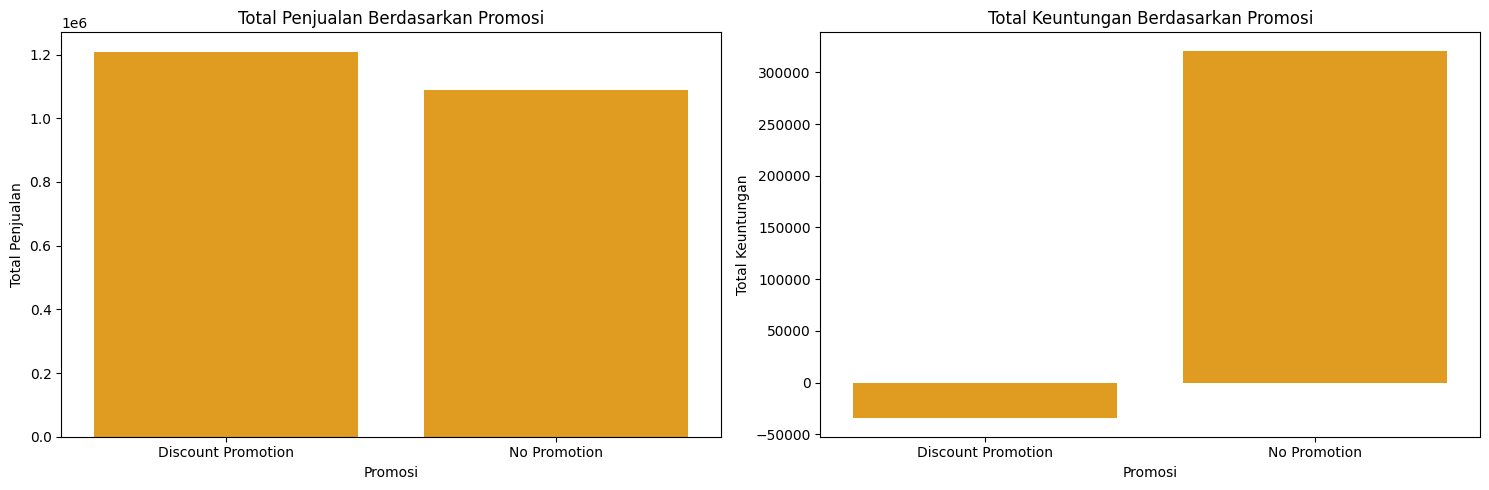

In [ ]:
# Membuat kanvas 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualisasi total penjualan berdasarkan promosi
sns.barplot(x='Promotion', y='Sales', data=promosi_analisis, ax=axes[0], color='orange')
axes[0].set_title('Total Penjualan Berdasarkan Promosi')
axes[0].set_xlabel('Promosi')
axes[0].set_ylabel('Total Penjualan')

# Visualisasi total keuntungan berdasarkan promosi
sns.barplot(x='Promotion', y='Profit', data=promosi_analisis, ax=axes[1], color='orange')
axes[1].set_title('Total Keuntungan Berdasarkan Promosi')
axes[1].set_xlabel('Promosi')
axes[1].set_ylabel('Total Keuntungan')

# Menyesuaikan spasi diantara subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


In [ ]:
# Uji Kruskal-Wallis untuk membandingkan rata-rata penjualan berdasarkan promosi
statistic, pvalue = kruskal(
    sales.loc[sales['Promotion'] == 'No Promotion', 'Sales'],
    sales.loc[sales['Promotion'] == 'Discount Promotion', 'Sales']
)

# Interpretasi hasil uji
alpha = 0.05
if pvalue < alpha:
    print(f"Tolak H0. Terdapat perbedaan signifikan rata-rata penjualan antara kelompok promosi (p-value: {pvalue:.4f}).")
else:
    print(f"Gagal tolak H0. Tidak terdapat perbedaan signifikan rata-rata penjualan antara kelompok promosi (p-value: {pvalue:.4f}).")


Gagal tolak H0. Tidak terdapat perbedaan signifikan rata-rata penjualan antara kelompok promosi (p-value: 0.1599).


**Interpretasi**

1. Dampak diskon terhadap penjualan, keuntungan, dan kuantitas:
  - Lineplot menunjukkan bahwa total penjualan, keuntungan, dan kuantitas cenderung meningkat pada besaran diskon tertentu.
  - Ini menunjukkan bahwa diskon efektif dalam meningkatkan penjualan, keuntungan, dan kuantitas barang yang terjual pada besaran tertentu
2. Rata-rata penjualan per transaksi berdasarkan diskon:
  - Lineplot menunjukkan bahwa rata-rata penjualan per transaksi cenderung meningkat pada besaran diskon tertentu.
  - Ini menunjukkan bahwa meskipun diskon efektif dalam meningkatkan penjualan pada besaran diskon tertentu.
3. Efektivitas diskon:
  - Perbandingan penjualan dan keuntungan sebelum dan sesudah diskon menunjukkan bahwa diskon efektif dalam meningkatkan penjualan, namun membuat keuntungan merugi.
4. Evaluasi strategi promosi:
  - Barplot menunjukkan bahwa total penjualan lebih tinggi pada kelompok transaksi yang mendapatkan promosi dibandingkan dengan kelompok transaksi yang tidak mendapatkan promosi, sedangkan untuk keuntungan merugi.
  - Ini menunjukkan bahwa strategi promosi yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan, tapi tidak untuk keuntungan.
5. Hasil uji Kruskal-Wallis:
  - Hasil uji Kruskal-Wallis menunjukkan bahwa terdapat perbedaan signifikan rata-rata penjualan antara kelompok promosi dan kelompok non-promosi.
  - Ini menunjukkan bahwa strategi promosi yang dilakukan perusahaan SaaS efektif dalam meningkatkan penjualan.

**Kesimpulan:**<br>
Berdasarkan interpretasi plot, hasil analisis, dan uji inferensial, dapat disimpulkan bahwa strategi diskon dan promosi yang dilakukan oleh perusahaan SaaS efektif dalam meningkatkan penjualan dan kuantitas barang yang terjual. Namun, perlu diperhatikan bahwa diskon dapat menurunkan keuntungan per transaksi. Oleh karena itu, perusahaan SaaS perlu mempertimbangkan dengan cermat strategi diskon dan promosi yang tepat untuk memaksimalkan penjualan dan keuntungan.


## **D. Peningkatan Pengalaman Pelanggan**

**Analisis Segmentasi Pelanggan: Mengidentifikasi segmen pelanggan berdasarkan berbagai atribut seperti industri, segmen, dan wilayah geografis**

In [ ]:
# Analisis distribusi pelanggan berdasarkan segmen
segmen_pelanggan = sales['Segment'].value_counts().reset_index()
segmen_pelanggan.columns = ['Segment', 'Count']

# Analisis distribusi pelanggan berdasarkan industri
industri_pelanggan = sales['Industry'].value_counts().reset_index()
industri_pelanggan.columns = ['Industry', 'Count']

# Analisis distribusi pelanggan berdasarkan wilayah geografis
wilayah_pelanggan = sales['Region'].value_counts().reset_index()
wilayah_pelanggan.columns = ['Region', 'Count']

display(segmen_pelanggan, industri_pelanggan, wilayah_pelanggan)

,Segment,Count
0,SMB,5191
1,Strategic,3020
2,Enterprise,1783


,Industry,Count
0,Finance,2127
1,Energy,1316
2,Tech,1236
3,Manufacturing,1222
4,Healthcare,1049
5,Consumer Products,1021
6,Retail,972
7,Communications,593
8,Transportation,351
9,Misc,107


,Region,Count
0,EMEA,4219
1,AMER,3665
2,APJ,2110


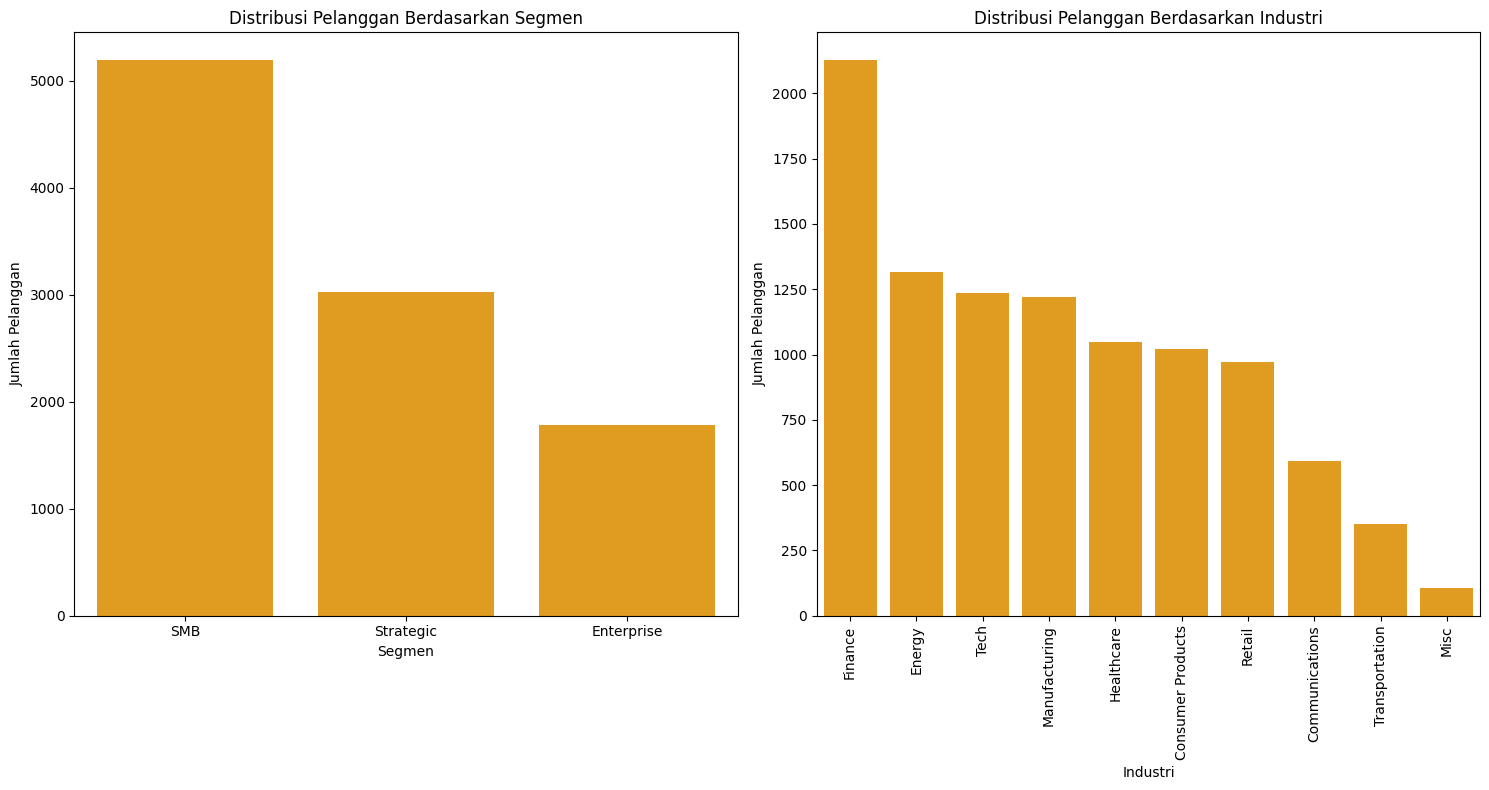

In [ ]:
# Membuat canvas dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Visualisasi distribusi pelanggan berdasarkan segmen
sns.barplot(x='Segment', y='Count', data=segmen_pelanggan, ax=axes[0], color='orange')
axes[0].set_title('Distribusi Pelanggan Berdasarkan Segmen')
axes[0].set_xlabel('Segmen')
axes[0].set_ylabel('Jumlah Pelanggan')

# Visualisasi distribusi pelanggan berdasarkan industri
sns.barplot(x='Industry', y='Count', data=industri_pelanggan, ax=axes[1], color='orange')
axes[1].set_title('Distribusi Pelanggan Berdasarkan Industri')
axes[1].set_xlabel('Industri')
axes[1].set_ylabel('Jumlah Pelanggan')

# Rotate x-axis tick labels for the second plot
plt.sca(axes[1]) # Set the current axes to the second plot
plt.xticks(rotation=90) # Rotate x-axis tick labels

# Menyesuaikan spasi diantara subplot
plt.tight_layout()

# Menampilkan plot
plt.show()

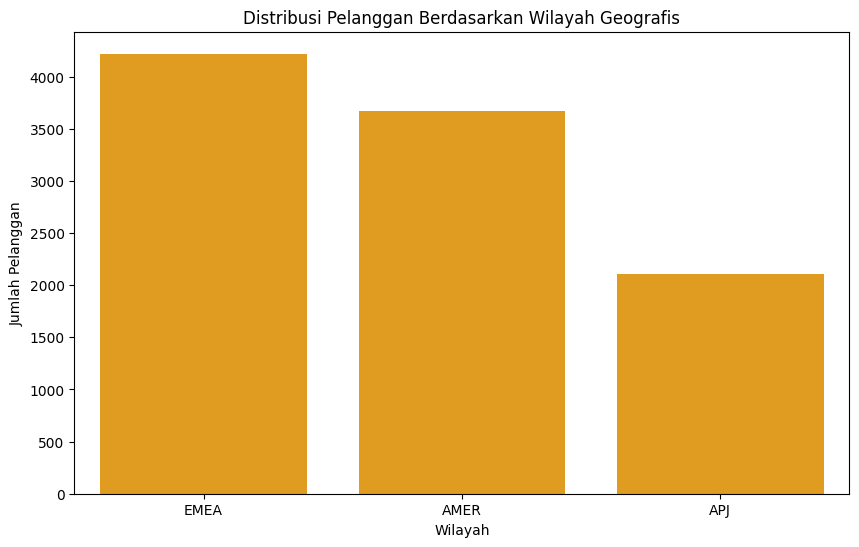

In [ ]:
# Visualisasi distribusi pelanggan berdasarkan wilayah geografis
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Count', data=wilayah_pelanggan, color='orange')
plt.title('Distribusi Pelanggan Berdasarkan Wilayah Geografis')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Pelanggan')
plt.show()

**Analisis Penjualan dan Profitabilitas**

In [ ]:
# Menghitung total penjualan dan keuntungan berdasarkan produk
produk_analisis = sales.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Mengurutkan produk berdasarkan total penjualan
produk_analisis = produk_analisis.sort_values(by='Sales', ascending=False)
produk_analisis

,Product,Sales,Profit
3,ContactMatcher,410378.2650,12496.2822
5,FinanceHub,340935.4150,32136.4203
11,Site Analytics,330007.0540,44515.7306
7,Marketing Suite - Gold,223843.6080,21278.8264
1,Big Ol Database,189238.6310,3384.7569
4,Data Smasher,167380.3180,41936.6357
0,Alchemy,149528.0300,55617.8249
13,Support,125152.7440,32864.4698
6,Marketing Suite,114879.9963,-3472.5560
8,OneView,107532.1610,18138.0054


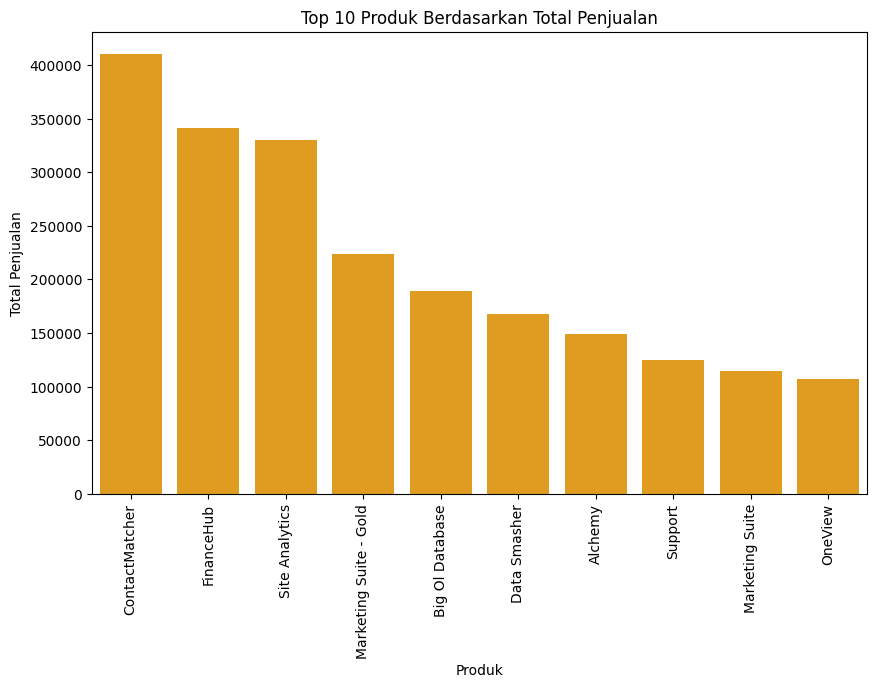

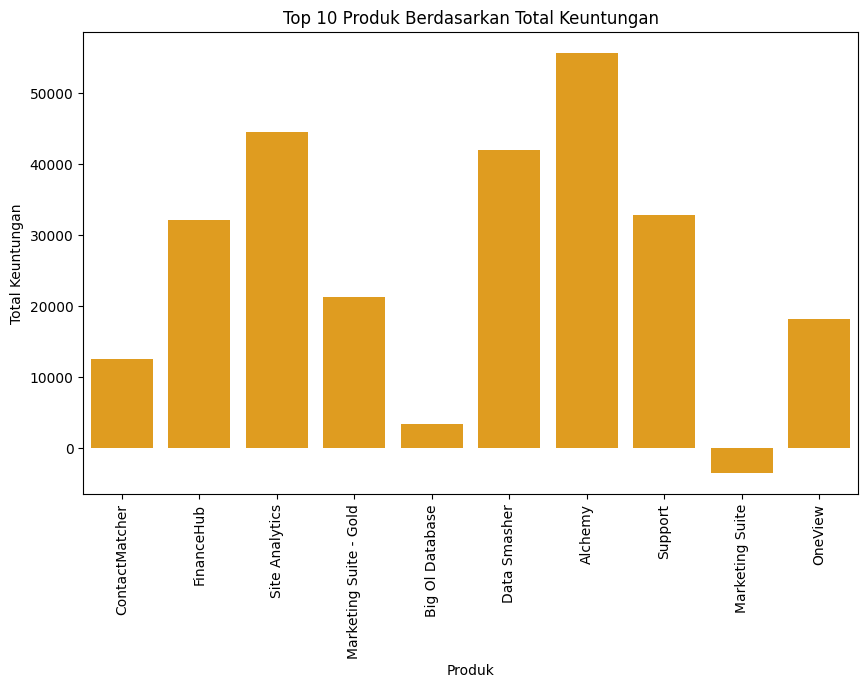

In [ ]:
# Visualisasi total penjualan berdasarkan produk
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Sales', data=produk_analisis.head(10), color='orange')
plt.title('Top 10 Produk Berdasarkan Total Penjualan')
plt.xlabel('Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=90)
plt.show()

# # Visualisasi total keuntungan berdasarkan produk
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Profit', data=produk_analisis.head(10), color='orange')
plt.title('Top 10 Produk Berdasarkan Total Keuntungan')
plt.xlabel('Produk')
plt.ylabel('Total Keuntungan')
plt.xticks(rotation=90)
plt.show()

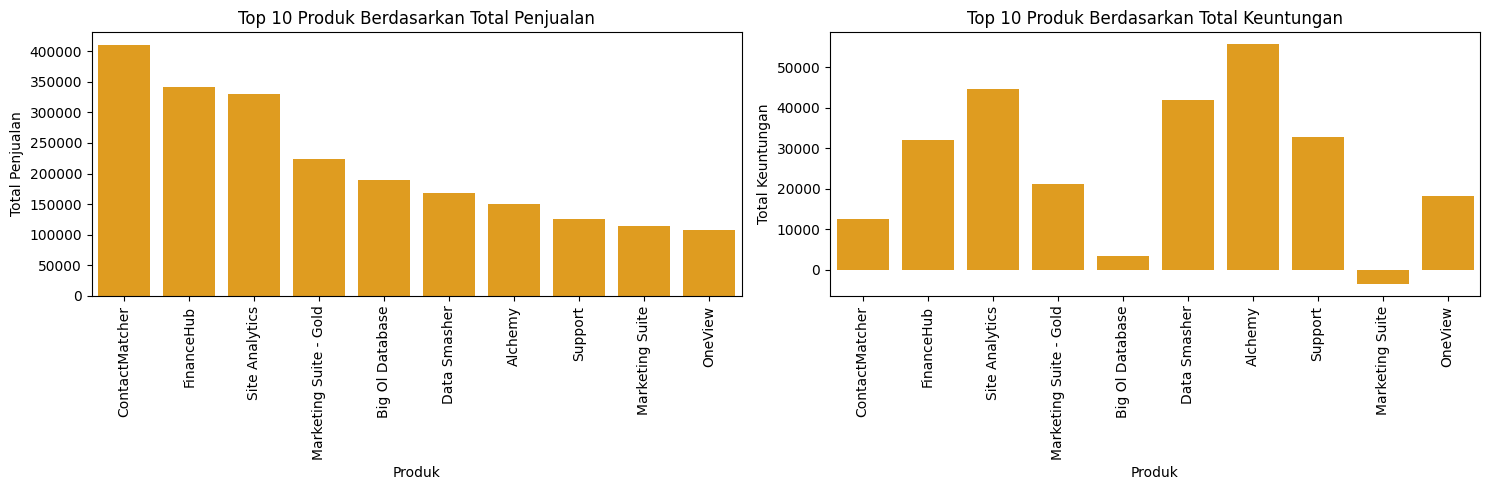

In [ ]:
# Membuat canvas 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Visualisasi total penjualan berdasarkan produk
sns.barplot(x='Product', y='Sales', data=produk_analisis.head(10), color='orange', ax=axes[0])
axes[0].set_title('Top 10 Produk Berdasarkan Total Penjualan')
axes[0].set_xlabel('Produk')
axes[0].set_ylabel('Total Penjualan')
axes[0].tick_params(axis='x', rotation=90)

# Visualisasi total keuntungan berdasarkan produk
sns.barplot(x='Product', y='Profit', data=produk_analisis.head(10), color='orange', ax=axes[1])
axes[1].set_title('Top 10 Produk Berdasarkan Total Keuntungan')
axes[1].set_xlabel('Produk')
axes[1].set_ylabel('Total Keuntungan')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Analisis Tren Penjualan: Mengidentifikasi tren penjualan dari waktu ke waktu untuk memahami pola permintaan pelanggan**

In [ ]:
# Menambahkan kolom bulan dan tahun untuk analisis temporal
sales['Month'] = sales['Order Date'].dt.month
sales['Year'] = sales['Order Date'].dt.year

# Menghitung total penjualan bulanan
penjualan_bulanan = sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
penjualan_bulanan


,Year,Month,Sales
0,2020,1,13946.2290
1,2020,2,4810.5580
2,2020,3,55691.0090
3,2020,4,28295.3450
4,2020,5,23648.2870
5,2020,6,34595.1276
6,2020,7,33946.3930
7,2020,8,27909.4685
8,2020,9,81777.3508
9,2020,10,31453.3930


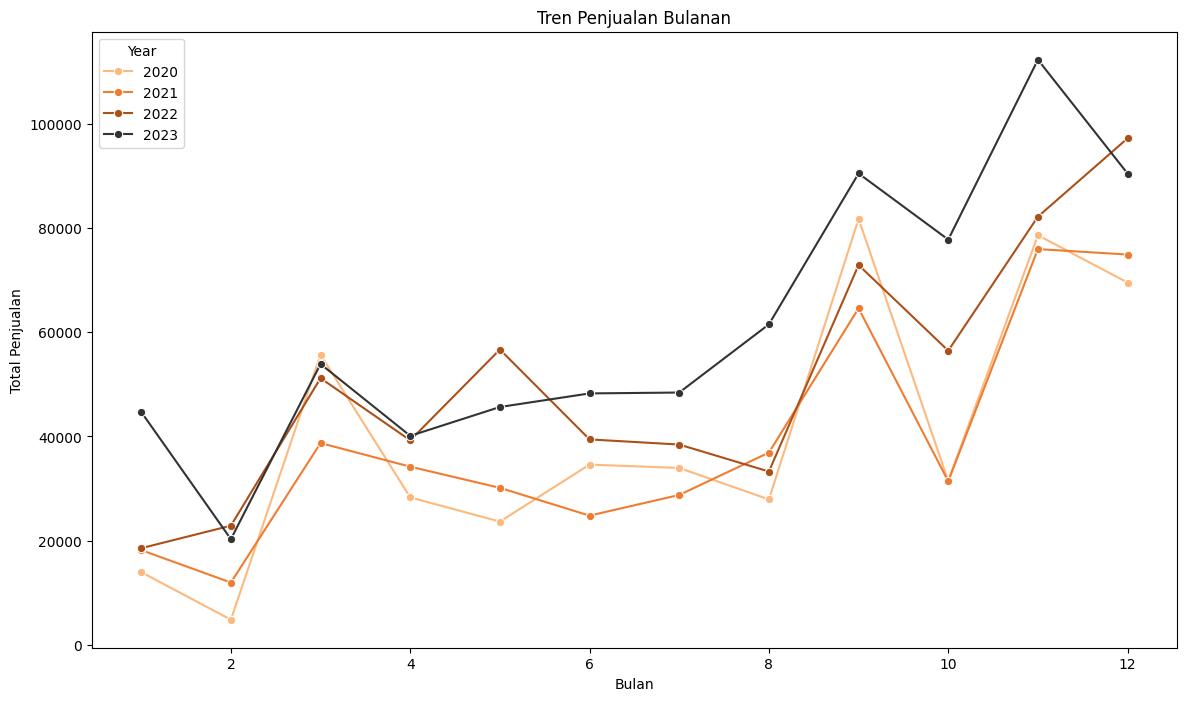

In [ ]:
# Visualisasi tren penjualan bulanan
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Sales', hue='Year', data=penjualan_bulanan, marker='o', palette='Oranges_d')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

**Interpretasi**
1. Distribusi Pelanggan:
  - Barplot menunjukkan bahwa segmen pelanggan terbesar adalah `SMB` dan `Strategic`, sedangkan industri terbesar adalah `Finance` dan `Energy`.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada pengembangan produk dan layanan yang memenuhi kebutuhan segmen pelanggan dan industri tersebut.
2. Tren Penjualan Bulanan:
  - Lineplot menunjukkan bahwa penjualan cenderung meningkat dari bulan Agustus hingga Desember.
  - Ini menunjukkan bahwa perusahaan SaaS perlu memperhatikan strategi pemasaran dan promosi yang tepat selama periode tersebut untuk memaksimalkan penjualan.
3. Top 10 Produk Berdasarkan Penjualan dan Keuntungan:
  - Barplot menunjukkan bahwa produk-produk seperti `ContactMatcher`, `FinanceHub`, dan `Site Analytics` memiliki penjualan dan keuntungan tertinggi.
  - Ini menunjukkan bahwa perusahaan SaaS perlu fokus pada pengembangan dan pemasaran produk-produk tersebut untuk meningkatkan penjualan dan keuntungan.

**Kesimpulan:**<br>

Berdasarkan interpretasi plot, dapat disimpulkan bahwa perusahaan SaaS perlu fokus pada pengembangan produk dan layanan yang memenuhi kebutuhan segmen pelanggan dan industri tertentu. Perusahaan SaaS juga perlu memperhatikan strategi pemasaran dan promosi yang tepat selama periode-periode tertentu untuk memaksimalkan penjualan. Selain itu, perusahaan SaaS perlu fokus pada pengembangan dan pemasaran produk-produk yang memiliki penjualan dan keuntungan tertinggi untuk meningkatkan penjualan dan keuntungan secara keseluruhan.


# **Kesimpulan dan Rekomendasi**

## **A. Kesimpulan**

1. Segmentasi Pelanggan dan Identifikasi Peluang Pasar
  - Analisis segmentasi pelanggan dan identifikasi peluang pasar menunjukkan bahwa perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan segmen pelanggan `Finance` dan industri `Energy`.
  - Perusahaan SaaS juga perlu fokus pada mempertahankan dan meningkatkan hubungan dengan pelanggan setia dan mengembangkan strategi pemasaran dan penjualan yang berbeda untuk setiap kelompok pelanggan berdasarkan frekuensi pembelian dan nilai transaksi rata-rata.
  - Selain itu, perusahaan SaaS perlu fokus pada strategi pemasaran dan penjualan yang menargetkan negara-negara dengan penjualan tertinggi, seperti `United States`, `United Kingdom`, dan `Japan`, serta kota-kota dengan penjualan tertinggi, seperti `London`, `New York City`, dan `Toronto`.5%.

2. Mengukur Efektivitas Kampanye Pemasaran
  - Berdasarkan interpretasi plot dan hasil uji statistik inferensial, dapat disimpulkan bahwa kampanye pemasaran yang dilakukan oleh perusahaan SaaS efektif dalam meningkatkan penjualan.
  - Kampanye `New Year Campaign` dan `Discount Campaign` berhasil meningkatkan total penjualan dan rata-rata penjualan harian.
  - Selain itu, kampanye pemasaran tersebut juga efektif dalam meningkatkan penjualan pada segmen pelanggan `SMB` dan industri `Finance`.
  - Diskon juga terbukti efektif dalam meningkatkan penjualan dan rata-rata penjualan harian pada besaran tertentu sebesar 5%.

3. Strategi Diskon dan Promosi
  - Berdasarkan interpretasi plot, hasil analisis, dan uji inferensial, dapat disimpulkan bahwa strategi diskon dan promosi yang dilakukan oleh perusahaan SaaS efektif dalam meningkatkan penjualan dan kuantitas barang yang terjual.
  - Namun, perlu diperhatikan bahwa diskon dapat menurunkan keuntungan per transaksi.
  - Oleh karena itu, perusahaan SaaS perlu mempertimbangkan dengan cermat strategi diskon dan promosi yang tepat untuk memaksimalkan penjualan dan keuntungan tinggi.

4. Peningkatan Pengalaman Pelanggan
  - Berdasarkan interpretasi plot, dapat disimpulkan bahwa perusahaan SaaS perlu fokus pada pengembangan produk dan layanan yang memenuhi kebutuhan segmen pelanggan dan industri tertentu.
  - Perusahaan SaaS juga perlu memperhatikan strategi pemasaran dan promosi yang tepat selama periode-periode tertentu untuk memaksimalkan penjualan.
  - Selain itu, perusahaan SaaS perlu fokus pada pengembangan dan pemasaran produk-produk yang memiliki penjualan dan keuntungan tertinggi untuk meningkatkan penjualan dan keuntungan secara keseluruhan.lai transaksi rata-rata sebesar 20%.

## **B. Rekomendasi**

1. Segmentasi Pelanggan dan Penargetan Pasar:
  - **Fokus pada segmen pelanggan `Finance` dan industri `Energy`:** Alokasikan lebih banyak sumber daya pemasaran dan penjualan untuk menjangkau dan menarik pelanggan di segmen dan industri ini. Kembangkan strategi pemasaran dan penjualan yang disesuaikan dengan kebutuhan dan preferensi mereka.
  - **Pertahankan dan tingkatkan hubungan dengan pelanggan setia:** Berikan program loyalitas dan penghargaan untuk pelanggan setia. Lakukan analisis churn rate untuk mengidentifikasi dan mengatasi faktor-faktor yang menyebabkan pelanggan berhenti menggunakan layanan.
  - **Kembangkan strategi pemasaran dan penjualan yang berbeda berdasarkan frekuensi pembelian dan nilai transaksi rata-rata:** Segmentasikan pelanggan berdasarkan perilaku pembelian mereka dan kembangkan strategi yang ditargetkan untuk setiap segmen. Contohnya, tawarkan diskon yang lebih besar untuk pelanggan dengan nilai transaksi rata-rata yang tinggi.
  - **Fokus pada negara-negara dan kota dengan penjualan tertinggi:** Alokasikan lebih banyak sumber daya pemasaran dan penjualan untuk menjangkau pasar di negara-negara dan kota ini. Pertimbangkan untuk menerjemahkan situs web dan materi pemasaran ke bahasa lokal.

2. Pengukuran Efektivitas Kampanye Pemasaran:

  - **Terus pantau dan evaluasi efektivitas kampanye pemasaran:** Gunakan berbagai metrik untuk mengukur keberhasilan kampanye, seperti total penjualan, rata-rata penjualan harian, dan akuisisi pelanggan baru. Lakukan penyesuaian pada strategi pemasaran berdasarkan hasil evaluasi.
  - **Gunakan metode statistik inferensial untuk menguji efektivitas kampanye:** Gunakan uji statistik untuk menentukan apakah kampanye pemasaran memiliki dampak yang signifikan terhadap penjualan. Hal ini akan membantu dalam menentukan kampanye mana yang paling efektif dan harus diulang atau ditingkatkan.

3. Strategi Diskon dan Promosi:

  - **Tawarkan diskon yang ditargetkan:** Berikan diskon kepada segmen pelanggan atau industri tertentu. Gunakan data penjualan untuk menentukan besaran diskon yang optimal.
  - **Gunakan diskon untuk meningkatkan penjualan produk-produk dengan margin keuntungan tinggi:** Tawarkan diskon pada produk-produk yang memiliki margin keuntungan tinggi untuk meningkatkan keuntungan secara keseluruhan.
  - **Gunakan kombinasi diskon dan promosi lainnya:** Kombinasikan diskon dengan strategi promosi lainnya, seperti program loyalitas, kontes, dan penawaran waktu terbatas.

4. Peningkatan Pengalaman Pelanggan:

  - **Lakukan survei dan riset pasar untuk memahami kebutuhan pelanggan:** Pahami apa yang diinginkan dan dibutuhkan pelanggan dari produk dan layanan Anda. Gunakan informasi ini untuk mengembangkan produk dan layanan yang lebih baik.
  - **Kembangkan produk dan layanan yang memenuhi kebutuhan segmen pelanggan dan industri tertentu:** Fokus pada pengembangan produk dan layanan yang disesuaikan dengan kebutuhan spesifik dari berbagai segmen pelanggan dan industri.
  - **Berikan layanan pelanggan yang excellent:** Pastikan pelanggan mendapatkan layanan yang cepat, ramah, dan membantu. Sediakan berbagai saluran layanan pelanggan, seperti email, telepon, dan live chat.
  - **Gunakan teknologi untuk meningkatkan pengalaman pelanggan:** Gunakan teknologi untuk mempersonalisasi pengalaman pelanggan, seperti rekomendasi produk dan penawaran yang ditargetkan.